# Project: Retail & Marketing Analytics - Customer Segmentation & Sales Optimization

# PART 1: Understanding the data

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
from pathlib import Path

In [10]:
df = pd.read_csv("retail_sales_data_raw.csv")

In [11]:
df.head(3)

,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name,Segment,Region,Product_ID,Product_Category,Product_Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Unit_Price,Revenue
0,ORD000001,2022-01-01 00:00:00,2022-01-02 00:00:00,CUST1127,Customer_1275,Consumer,Central,PROD0215,Office Supplies,Appliances,Product_2,235.926440,1,0.00,39.775401,8.157251,High,235.926440,235.926440
1,ORD000002,2022-01-01 01:00:00,2022-01-02 01:00:00,CUST1460,Customer_1334,Corporate,East,PROD0002,Furniture,Shirts,Product_206,180.502739,9,0.15,12.835350,3.822394,Medium,20.055860,180.502739
2,ORD000003,2022-01-01 02:00:00,2022-01-02 02:00:00,CUST0861,Customer_1744,Corporate,East,PROD0121,Electronics,Paper,Product_230,40.976998,7,0.00,46.203636,9.084032,Low,5.853857,40.976998


In [9]:
df.shape

(10000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              10000 non-null  object 
 1   Order_Date            10000 non-null  object 
 2   Ship_Date             10000 non-null  object 
 3   Customer_ID           10000 non-null  object 
 4   Customer_Name         9950 non-null   object 
 5   Segment               10000 non-null  object 
 6   Region                10000 non-null  object 
 7   Product_ID            10000 non-null  object 
 8   Product_Category      10000 non-null  object 
 9   Product_Sub_Category  10000 non-null  object 
 10  Product_Name          10000 non-null  object 
 11  Sales                 10000 non-null  float64
 12  Quantity              10000 non-null  int64  
 13  Discount              10000 non-null  float64
 14  Profit                9970 non-null   float64
 15  Shipping_Cost       

In [6]:
df.isnull().sum()

Order_ID                 0
Order_Date               0
Ship_Date                0
Customer_ID              0
Customer_Name           50
Segment                  0
Region                   0
Product_ID               0
Product_Category         0
Product_Sub_Category     0
Product_Name             0
Sales                    0
Quantity                 0
Discount                 0
Profit                  30
Shipping_Cost            0
Order_Priority           0
Unit_Price               0
Revenue                  0
dtype: int64

In [7]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping_Cost,Unit_Price,Revenue
count,10000.000000,10000.000000,10000.00000,9970.000000,10000.000000,10000.000000,10000.000000
mean,109.919718,5.006500,0.09154,19.806369,6.524051,34.595699,109.919718
std,71.361990,2.575679,0.08378,30.514838,3.686363,42.690397,71.361990
min,10.353156,1.000000,0.00000,-97.441172,2.007435,1.363330,10.353156
25%,58.329671,3.000000,0.00000,-0.676147,3.849082,11.106737,58.329671
50%,92.921765,5.000000,0.10000,20.329955,5.594567,20.529712,92.921765
75%,145.130765,7.000000,0.15000,40.305723,8.157661,39.758830,145.130765
max,622.935663,9.000000,0.25000,133.699236,36.467989,540.180333,622.935663


In [18]:
df.duplicated().sum()

np.int64(0)

In [39]:
duplicates = df.duplicated().sum()
print(f" Duplicate Rows: {duplicates}")

# To remove - df.drop_duplicates(inplace= True)

 Duplicate Rows: 0


In [22]:
# Unique values per column
print("\n Unique Values per Column:")
unique_counts = pd.DataFrame({
    'Column': df.columns,
    'Unique_Count': [df[col].nunique() for col in df.columns],
    'Data_Type': df.dtypes.values
})
print(unique_counts)


 Unique Values per Column:
                  Column  Unique_Count Data_Type
0               Order_ID         10000    object
1             Order_Date         10000    object
2              Ship_Date         10000    object
3            Customer_ID          1986    object
4          Customer_Name          1982    object
5                Segment             3    object
6                 Region             4    object
7             Product_ID           499    object
8       Product_Category             4    object
9   Product_Sub_Category             8    object
10          Product_Name           499    object
11                 Sales         10000   float64
12              Quantity             9     int64
13              Discount             5   float64
14                Profit          9970   float64
15         Shipping_Cost         10000   float64
16        Order_Priority             4    object
17            Unit_Price         10000   float64
18               Revenue         10000   


 Missing Values:
           Column  Missing_Count  Missing_Percentage
4   Customer_Name             50                 0.5
14         Profit             30                 0.3


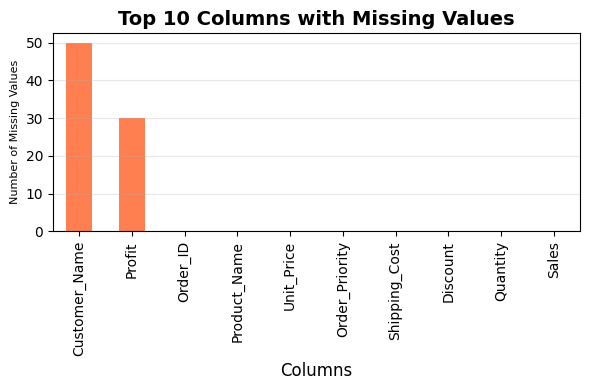

In [64]:
# Missing values
print("\n Missing Values:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

fig, ax = plt.subplots(figsize=(6, 4))
missing_data_plot = df.isnull().sum().sort_values(ascending=False)[:10]
missing_data_plot.plot(kind='bar', ax=ax, color='coral')
ax.set_title('Top 10 Columns with Missing Values', fontsize=14, fontweight='bold')
ax.set_xlabel('Columns', fontsize=12)
ax.set_ylabel('Number of Missing Values', fontsize=8)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# PART 2:  Cleaning & Preprocessing of data

In [73]:
# Create a copy for cleaning
df_clean = df.copy()

In [74]:
# Separate columns by type
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Handle numerical missing values - Fill with median
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_value)
        print(f" {col}: Filled with median ({median_value:.2f})")

# Handle categorical missing values - Fill with mode or 'Unknown'
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].mode().empty:
            df_clean[col] = df_clean[col].fillna('Unknown')
            print(f" {col}: Filled with 'Unknown'")
        else:
            mode_value = df_clean[col].mode()[0]
            df_clean[col] = df_clean[col].fillna(mode_value)
            print(f"{col}: Filled with mode ('{mode_value}')")

 Profit: Filled with median (20.33)
Customer_Name: Filled with mode ('Customer_133')


In [75]:
# Verify no missing values remain
print(f" Missing values after pre-processing: {df_clean.isnull().sum().sum()}")

 Missing values after pre-processing: 0


In [76]:
df.dtypes

Order_ID                           str
Order_Date              datetime64[us]
Ship_Date                          str
Customer_ID                        str
Customer_Name                      str
Segment                            str
Region                             str
Product_ID                         str
Product_Category                   str
Product_Sub_Category               str
Product_Name                       str
Sales                          float64
Quantity                         int64
Discount                       float64
Profit                         float64
Shipping_Cost                  float64
Order_Priority                     str
Unit_Price                     float64
Revenue                        float64
dtype: object

In [77]:
df_clean['Order_Date'] = pd.to_datetime(df_clean['Order_Date'], errors='coerce') 
df_clean['Ship_Date'] = pd.to_datetime(df_clean['Ship_Date'], errors='coerce') 

In [79]:
# Convert categorical columns to category type for memory optimization
categorical_columns = ['Segment', 'Region', 'Product_Category', 'Product_Sub_Category', 'Order_Priority']
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')
        print(f" Converted {col} to category")

 Converted Segment to category
 Converted Region to category
 Converted Product_Category to category
 Converted Product_Sub_Category to category
 Converted Order_Priority to category


In [44]:
df_clean.dtypes

Order_ID                        object
Order_Date              datetime64[ns]
Ship_Date               datetime64[ns]
Customer_ID                     object
Customer_Name                   object
Segment                       category
Region                        category
Product_ID                      object
Product_Category              category
Product_Sub_Category          category
Product_Name                    object
Sales                          float64
Quantity                         int64
Discount                       float64
Profit                         float64
Shipping_Cost                  float64
Order_Priority                category
Unit_Price                     float64
Revenue                        float64
dtype: object

Outlier Analysis:
Sales:
  - Outliers detected: 328 (3.28%)
  - Lower bound: -71.87
  - Upper bound: 275.33
Quantity:
  - Outliers detected: 0 (0.00%)
  - Lower bound: -3.00
  - Upper bound: 13.00
Profit:
  - Outliers detected: 87 (0.87%)
  - Lower bound: -61.87
  - Upper bound: 101.47


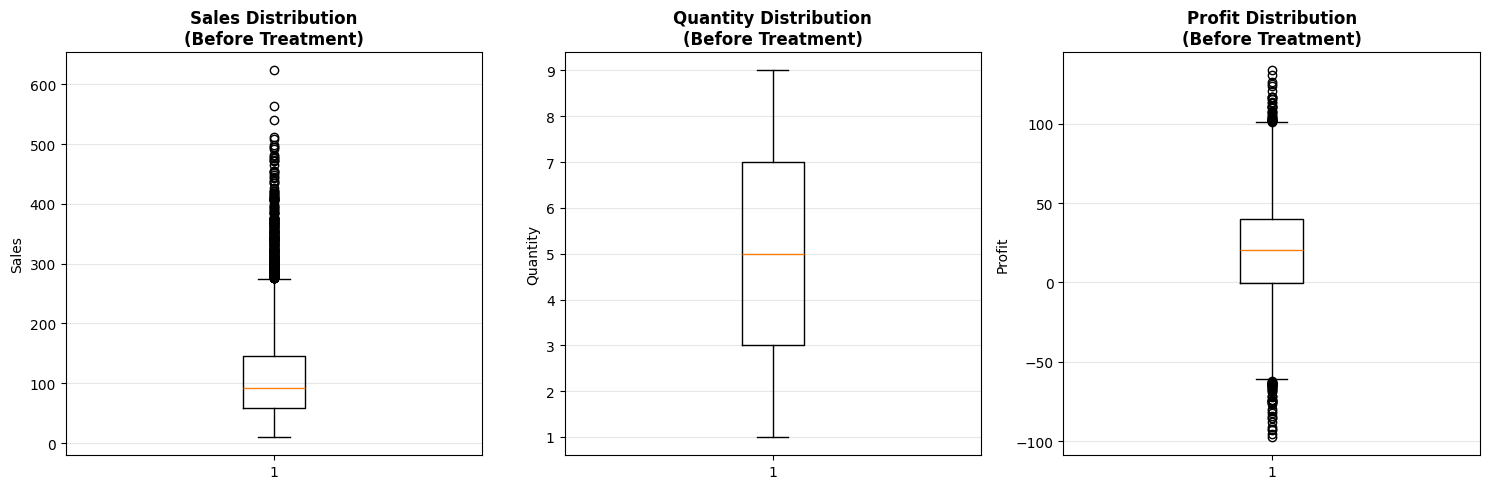

In [81]:
# OUTLIER DETECTION AND TREATMENT
def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in key numerical columns
outlier_columns = ['Sales', 'Quantity', 'Profit'] if 'Profit' in df_clean.columns else ['Sales', 'Quantity']

print("Outlier Analysis:")
outlier_summary = []
for col in outlier_columns:
    if col in df_clean.columns:
        outliers, lb, ub = detect_outliers_iqr(df_clean, col)
        outlier_pct = (len(outliers) / len(df_clean) * 100)
        outlier_summary.append({
            'Column': col,
            'Outliers': len(outliers),
            'Percentage': f"{outlier_pct:.2f}%",
            'Lower_Bound': f"{lb:.2f}",
            'Upper_Bound': f"{ub:.2f}"
        })
        print(f"{col}:")
        print(f"  - Outliers detected: {len(outliers)} ({outlier_pct:.2f}%)")
        print(f"  - Lower bound: {lb:.2f}")
        print(f"  - Upper bound: {ub:.2f}")

# Visualize outliers before treatment
fig, axes = plt.subplots(1, len(outlier_columns), figsize=(15, 5))
if len(outlier_columns) == 1:
    axes = [axes]
for idx, col in enumerate(outlier_columns):
    if col in df_clean.columns:
        axes[idx].boxplot(df_clean[col].dropna())
        axes[idx].set_title(f'{col} Distribution\n(Before Treatment)', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Outlier Treatment (Capping):


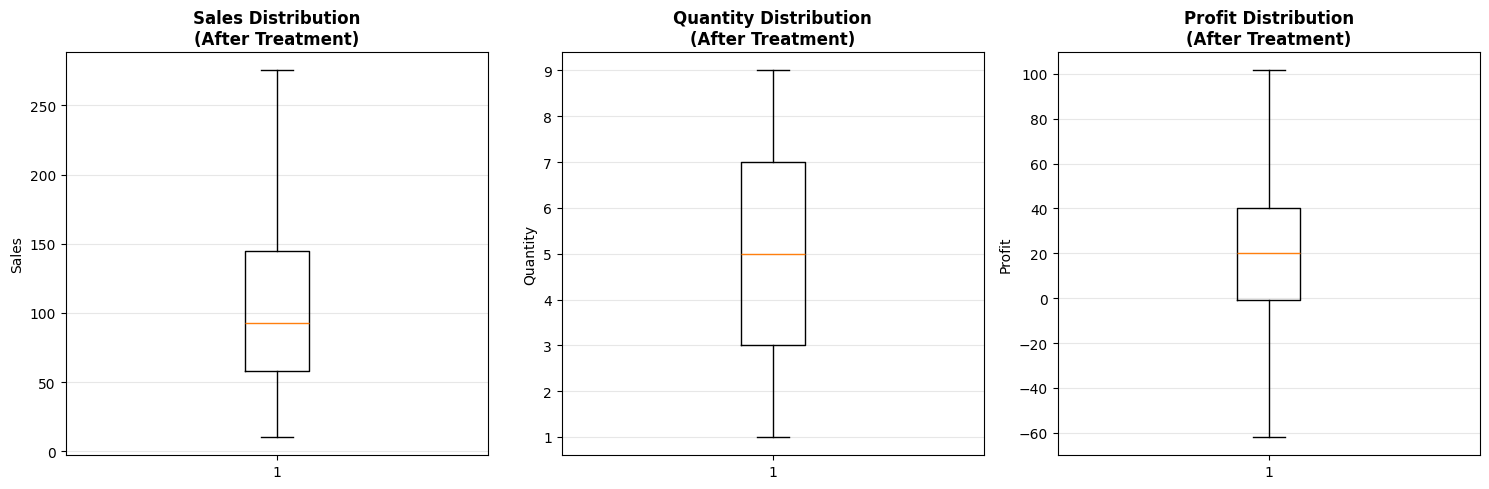

In [83]:
# Treatment: Cap outliers (Winsorization)
print("Outlier Treatment (Capping):")
for col in outlier_columns:
    if col in df_clean.columns:
        outliers, lb, ub = detect_outliers_iqr(df_clean, col)
        if len(outliers) > 0:
            # Cap values
            df_clean[f'{col}_Original'] = df_clean[col]  # Keep original for reference
            df_clean[col] = df_clean[col].clip(lower=lb, upper=ub)
            print(f"{col}: Outliers capped to [{lb:.2f}, {ub:.2f}]")

# Visualize after treatment
fig, axes = plt.subplots(1, len(outlier_columns), figsize=(15, 5))
if len(outlier_columns) == 1:
    axes = [axes]

for idx, col in enumerate(outlier_columns):
    if col in df_clean.columns:
        axes[idx].boxplot(df_clean[col].dropna())
        axes[idx].set_title(f'{col} Distribution\n(After Treatment)', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [85]:
# FEATURE ENGINEERING
# 1. Time-based features
if 'Order_Date' in df_clean.columns:
    print(" Creating Time-Based Features:")
    df_clean['Year'] = df_clean['Order_Date'].dt.year
    df_clean['Month'] = df_clean['Order_Date'].dt.month
    df_clean['Month_Name'] = df_clean['Order_Date'].dt.month_name()
    df_clean['Quarter'] = df_clean['Order_Date'].dt.quarter
    df_clean['Day'] = df_clean['Order_Date'].dt.day
    df_clean['Day_of_Week'] = df_clean['Order_Date'].dt.dayofweek
    df_clean['Day_Name'] = df_clean['Order_Date'].dt.day_name()
    df_clean['Week_of_Year'] = df_clean['Order_Date'].dt.isocalendar().week
    df_clean['Is_Weekend'] = df_clean['Day_of_Week'].isin([5, 6]).astype(int)
    df_clean['Is_Month_Start'] = df_clean['Order_Date'].dt.is_month_start.astype(int)
    df_clean['Is_Month_End'] = df_clean['Order_Date'].dt.is_month_end.astype(int)
    print(" Year, Month, Quarter, Day, Day of Week")
    print(" Weekend indicator, Month start/end flags")

# 2. Revenue and profit metrics
if 'Sales' in df_clean.columns and 'Quantity' in df_clean.columns:
    print("\n Creating Revenue Metrics:")
    df_clean['Unit_Price'] = df_clean['Sales'] / df_clean['Quantity']
    df_clean['Revenue'] = df_clean['Sales']
    
    if 'Discount' in df_clean.columns:
        df_clean['Discount_Amount'] = df_clean['Sales'] * df_clean['Discount']
        df_clean['Net_Revenue'] = df_clean['Sales'] - df_clean['Discount_Amount']
        print(" Unit Price, Revenue, Discount Amount, Net Revenue")
    
    if 'Profit' in df_clean.columns:
        df_clean['Profit_Margin'] = (df_clean['Profit'] / df_clean['Sales']) * 100
        df_clean['Profit_Ratio'] = df_clean['Profit'] / df_clean['Sales']
        print(" Profit Margin, Profit Ratio")

# 3. Delivery time calculation
if 'Order_Date' in df_clean.columns and 'Ship_Date' in df_clean.columns:
    print("\n Creating Delivery Metrics:")
    df_clean['Delivery_Days'] = (df_clean['Ship_Date'] - df_clean['Order_Date']).dt.days
    df_clean['Delivery_Category'] = pd.cut(df_clean['Delivery_Days'], 
                                           bins=[-np.inf, 2, 5, 10, np.inf],
                                           labels=['Same/Next Day', 'Standard', 'Delayed', 'Very Delayed'])
    print(" Delivery Days, Delivery Category")

# 4. Customer frequency (aggregated later, but flag here)
if 'Customer_ID' in df_clean.columns:
    print("\n Creating Customer Flags:")
    customer_order_count = df_clean.groupby('Customer_ID').size()
    df_clean['Customer_Order_Count'] = df_clean['Customer_ID'].map(customer_order_count)
    df_clean['Is_Repeat_Customer'] = (df_clean['Customer_Order_Count'] > 1).astype(int)
    print(" Customer Order Count, Repeat Customer Flag")

# 5. Product performance metrics
if 'Product_ID' in df_clean.columns:
    print("\n Creating Product Metrics:")
    product_sales = df_clean.groupby('Product_ID')['Sales'].agg(['sum', 'mean', 'count'])
    product_sales.columns = ['Product_Total_Sales', 'Product_Avg_Sales', 'Product_Order_Count']
    df_clean = df_clean.merge(product_sales, left_on='Product_ID', right_index=True, how='left')
    print(" Product Total Sales, Average Sales, Order Count")

# 6. Sales categories
if 'Sales' in df_clean.columns:
    print("\n Creating Sales Categories:")
    df_clean['Sales_Category'] = pd.qcut(df_clean['Sales'], 
                                         q=4, 
                                         labels=['Low', 'Medium', 'High', 'Very High'],
                                         duplicates='drop')
    print(" Sales Category (Quartile-based)")

# 7. Season classification
if 'Month' in df_clean.columns:
    print("\n Creating Seasonal Features:")
    season_map = {
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    }
    df_clean['Season'] = df_clean['Month'].map(season_map)
    print(" Season")

print(f"New dataset shape: {df_clean.shape}")

 Creating Time-Based Features:
 Year, Month, Quarter, Day, Day of Week
 Weekend indicator, Month start/end flags

 Creating Revenue Metrics:
 Unit Price, Revenue, Discount Amount, Net Revenue
 Profit Margin, Profit Ratio

 Creating Delivery Metrics:
 Delivery Days, Delivery Category

 Creating Customer Flags:
 Customer Order Count, Repeat Customer Flag

 Creating Product Metrics:
 Product Total Sales, Average Sales, Order Count

 Creating Sales Categories:
 Sales Category (Quartile-based)

 Creating Seasonal Features:
 Season
New dataset shape: (10000, 48)


In [86]:
# Check for negative values in key columns
validation_checks = []
if 'Sales' in df_clean.columns:
    negative_sales = (df_clean['Sales'] < 0).sum()
    validation_checks.append(f"Negative Sales: {negative_sales}")
if 'Quantity' in df_clean.columns:
    negative_qty = (df_clean['Quantity'] <= 0).sum()
    validation_checks.append(f"Zero/Negative Quantity: {negative_qty}")
if 'Discount' in df_clean.columns:
    invalid_discount = ((df_clean['Discount'] < 0) | (df_clean['Discount'] > 1)).sum()
    validation_checks.append(f"Invalid Discount: {invalid_discount}")
for check in validation_checks:
    print(f"  • {check}")
# Check date consistency
if 'Order_Date' in df_clean.columns and 'Ship_Date' in df_clean.columns:
    invalid_dates = (df_clean['Ship_Date'] < df_clean['Order_Date']).sum()
    print(f"  • Ship Date before Order Date: {invalid_dates}")

print("Validation Complete")

  • Negative Sales: 0
  • Zero/Negative Quantity: 0
  • Invalid Discount: 0
  • Ship Date before Order Date: 0
Validation Complete


In [87]:
print(f"Records removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Features added: {df_clean.shape[1] - df.shape[1]}")

Records removed: 0
Features added: 29


In [88]:
df_clean.to_csv("retail_sales_data_processed.csv", index=False)

# SAVING THE CLEANED DATASET

In [60]:
os.listdir()

['.ipynb_checkpoints',
 'retail&marketing.ipynb',
 'retail_sales_data_processed.csv',
 'retail_sales_data_raw.csv']

# PART 3: Data Visualization: EDA

In [27]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')

In [28]:
df1 = pd.read_csv("retail_sales_data_processed.csv")

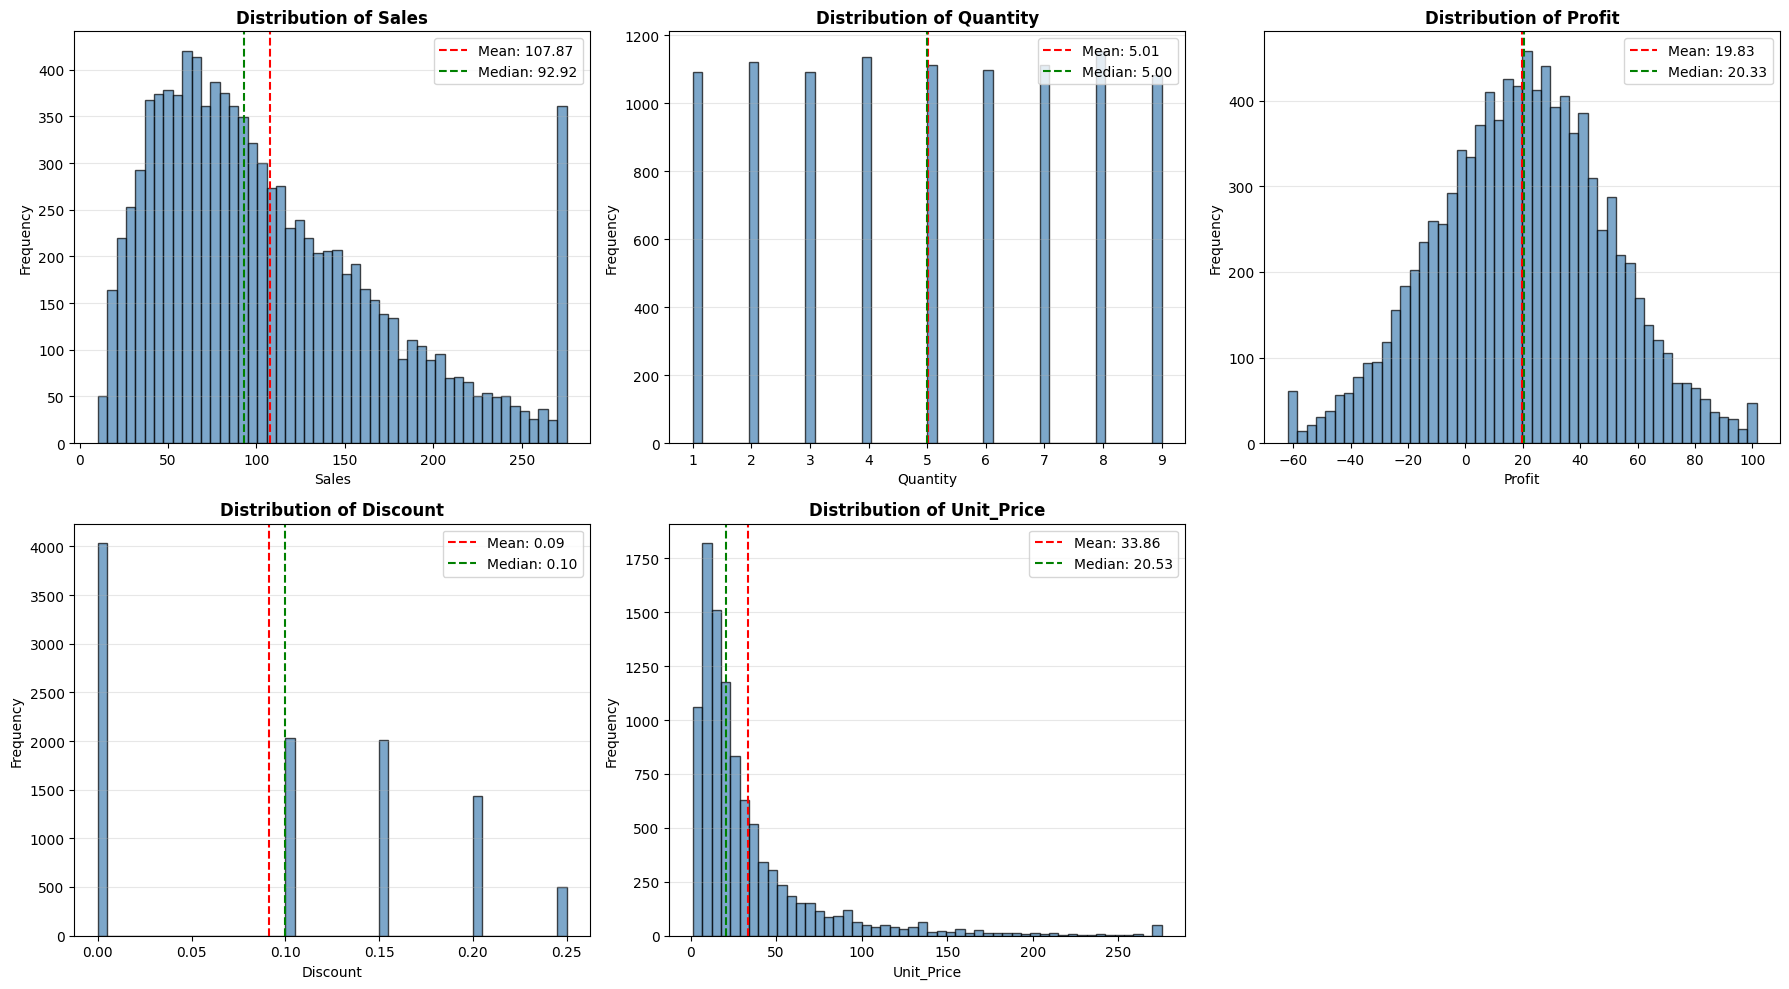

In [89]:
# UNIVARIATE ANALYSIS - NUMERICAL VARIABLES
numerical_cols = ['Sales', 'Quantity', 'Profit', 'Discount', 'Unit_Price']
numerical_cols = [col for col in numerical_cols if col in df1.columns]
# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        # Histogram with KDE
        axes[idx].hist(df1[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold', fontsize=12)
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].axvline(df1[col].mean(), color='red', linestyle='--', 
                         label=f'Mean: {df1[col].mean():.2f}')
        axes[idx].axvline(df1[col].median(), color='green', linestyle='--', 
                         label=f'Median: {df1[col].median():.2f}')
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)
        
# Remove empty subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

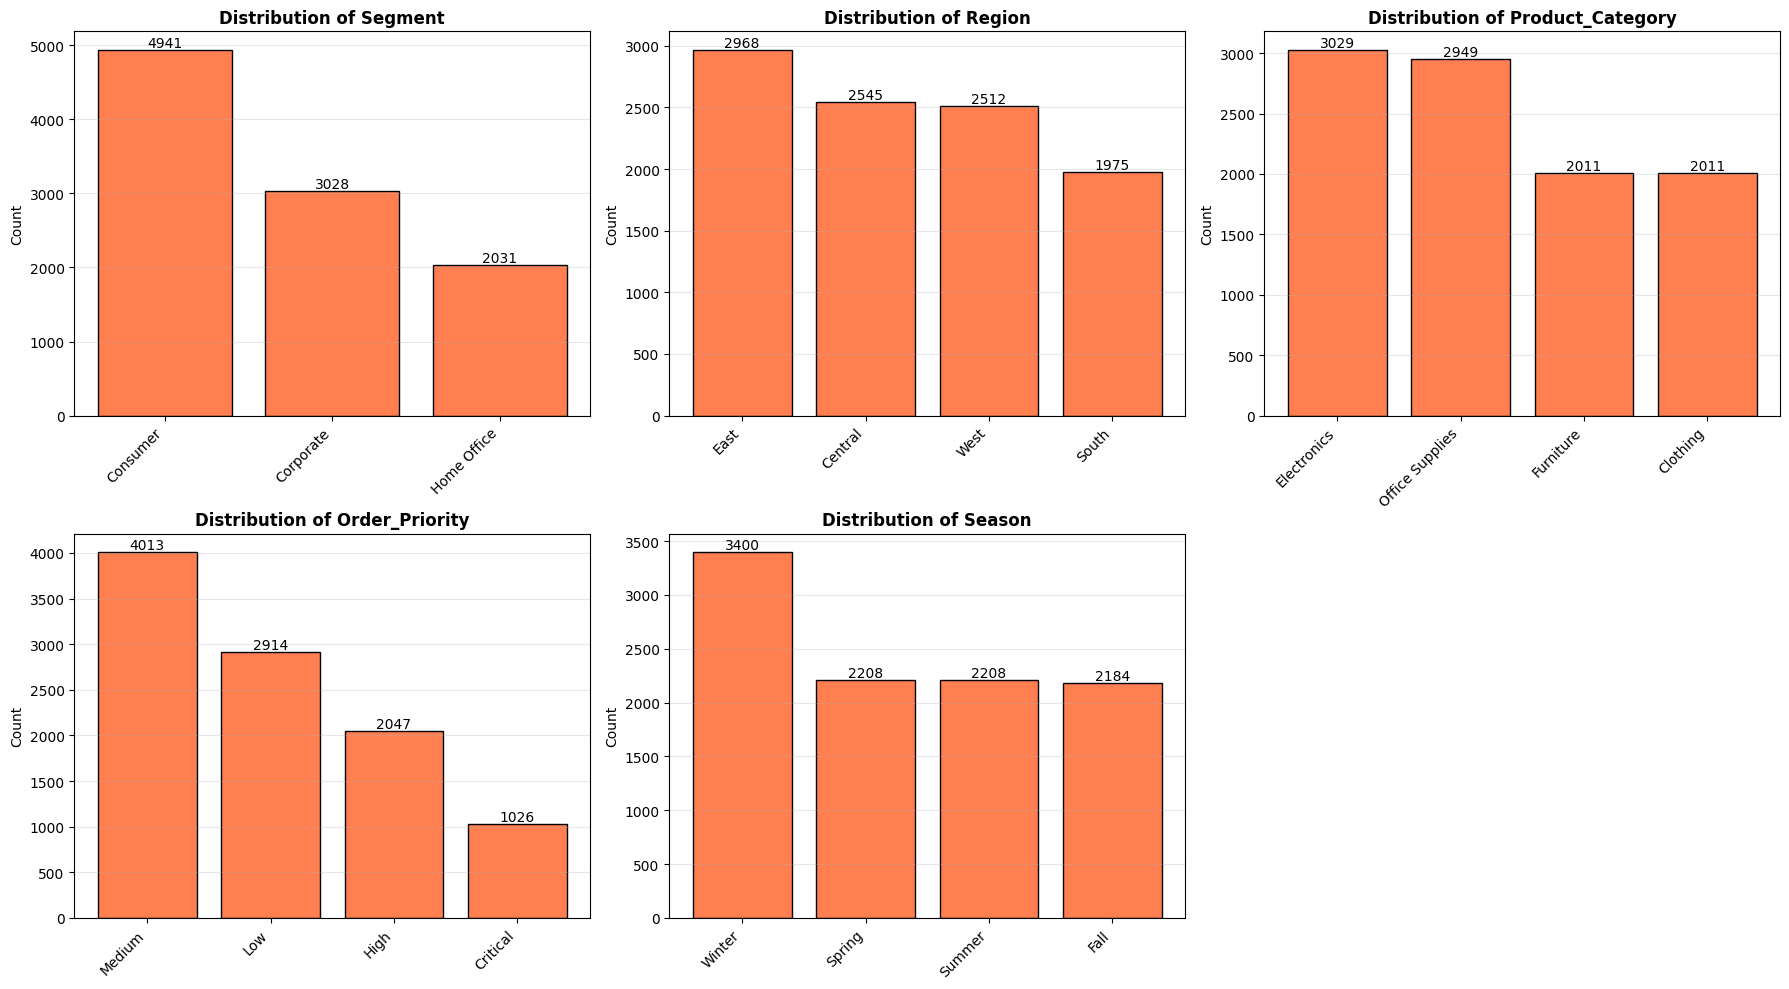

In [90]:
# UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES
categorical_cols = ['Segment', 'Region', 'Product_Category', 'Order_Priority', 'Season']
categorical_cols = [col for col in categorical_cols if col in df1.columns]

# Create bar plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df1[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='coral', edgecolor='black')
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold', fontsize=12)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v, str(v), ha='center', va='bottom')

# Remove empty subplots
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()


 Sales by Product Category:
                  Total_Sales  Avg_Sales  Order_Count
Product_Category                                     
Electronics         328422.71     108.43         3029
Office Supplies     321280.86     108.95         2949
Furniture           214958.03     106.89         2011
Clothing            214009.37     106.42         2011


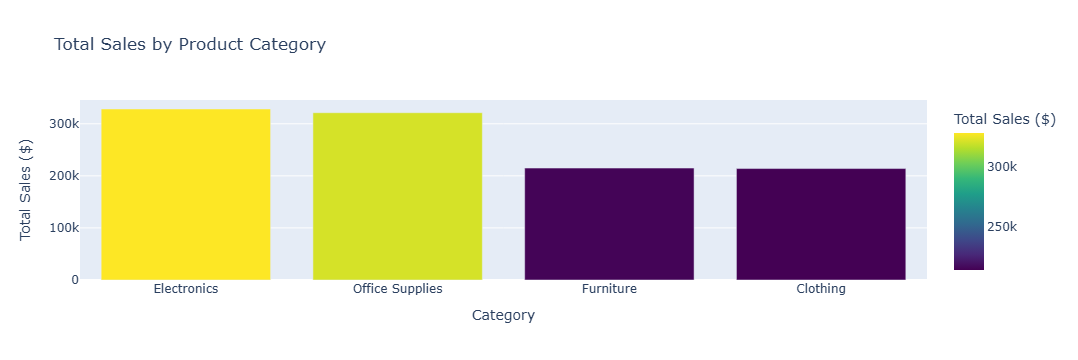


 Sales by Region:
         Total_Sales  Avg_Sales  Order_Count
Region                                      
East       318581.37     107.34         2968
Central    275688.18     108.33         2545
West       272330.96     108.41         2512
South      212070.47     107.38         1975


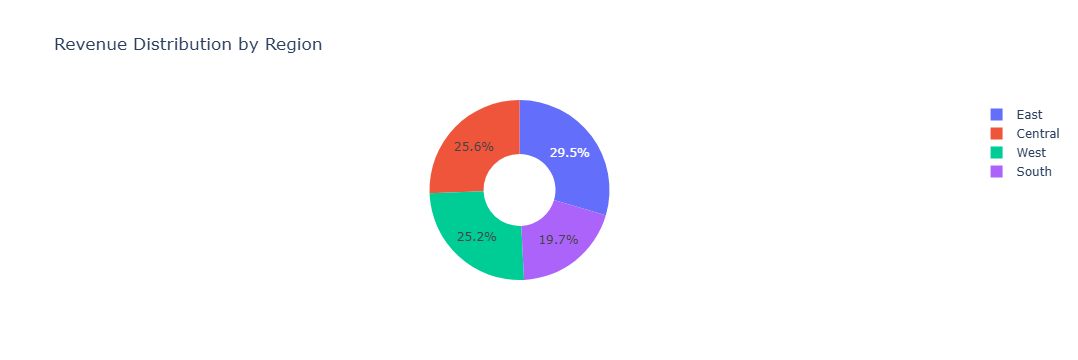


 Sales by Customer Segment:
             Total_Sales  Avg_Sales  Order_Count
Segment                                         
Consumer       537235.41     108.73         4941
Corporate      325499.15     107.50         3028
Home Office    215936.42     106.32         2031


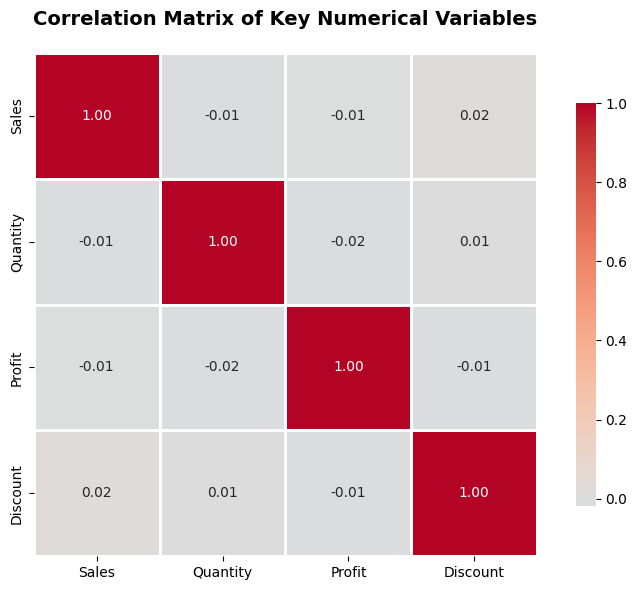


Correlation Coefficients:
             Sales  Quantity    Profit  Discount
Sales     1.000000 -0.010920 -0.005396  0.019058
Quantity -0.010920  1.000000 -0.018266  0.008203
Profit   -0.005396 -0.018266  1.000000 -0.011315
Discount  0.019058  0.008203 -0.011315  1.000000


In [92]:
# BIVARIATE ANALYSIS
# Sales by Category
if 'Product_Category' in df1.columns and 'Sales' in df1.columns:
    print("\n Sales by Product Category:")
    category_sales = df1.groupby('Product_Category')['Sales'].agg(['sum', 'mean', 'count']).round(2)
    category_sales.columns = ['Total_Sales', 'Avg_Sales', 'Order_Count']
    category_sales = category_sales.sort_values('Total_Sales', ascending=False)
    print(category_sales)
    
    fig = px.bar(category_sales.reset_index(), x='Product_Category', y='Total_Sales',title='Total Sales by Product Category',
                 labels={'Total_Sales': 'Total Sales ($)', 'Product_Category': 'Category'},color='Total_Sales', color_continuous_scale='viridis')
    fig.show()

# Sales by Region
if 'Region' in df1.columns and 'Sales' in df1.columns:
    print("\n Sales by Region:")
    region_sales = df1.groupby('Region')['Sales'].agg(['sum', 'mean', 'count']).round(2)
    region_sales.columns = ['Total_Sales', 'Avg_Sales', 'Order_Count']
    region_sales = region_sales.sort_values('Total_Sales', ascending=False)
    print(region_sales)
    
    fig = px.pie(region_sales.reset_index(), values='Total_Sales', names='Region',
                 title='Revenue Distribution by Region',hole=0.4)
    fig.show()

# Sales by Customer Segment
if 'Segment' in df1.columns and 'Sales' in df1.columns:
    print("\n Sales by Customer Segment:")
    segment_sales = df1.groupby('Segment')['Sales'].agg(['sum', 'mean', 'count']).round(2)
    segment_sales.columns = ['Total_Sales', 'Avg_Sales', 'Order_Count']
    print(segment_sales)

# Correlation Analysis
numerical_for_corr = ['Sales', 'Quantity', 'Profit', 'Discount']
numerical_for_corr = [col for col in numerical_for_corr if col in df1.columns]

correlation_matrix = df1[numerical_for_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Key Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation Coefficients:")
print(correlation_matrix)


 Monthly Sales Trend:
   YearMonth   Total_Sales  Avg_Order_Value  Order_Count
2    2022-03  81062.839630       108.955430          744
3    2022-04  75840.668735       105.334262          720
4    2022-05  80056.231269       107.602461          744
5    2022-06  76430.127987       106.152956          720
6    2022-07  80699.415429       108.466956          744
7    2022-08  82192.585990       110.473906          744
8    2022-09  76398.577746       106.109136          720
9    2022-10  77173.028698       103.727189          744
10   2022-11  78702.980474       109.309695          720
11   2022-12  82235.806623       110.531998          744
12   2023-01  78408.906190       105.388315          744
13   2023-02  54090.000133       109.052420          496


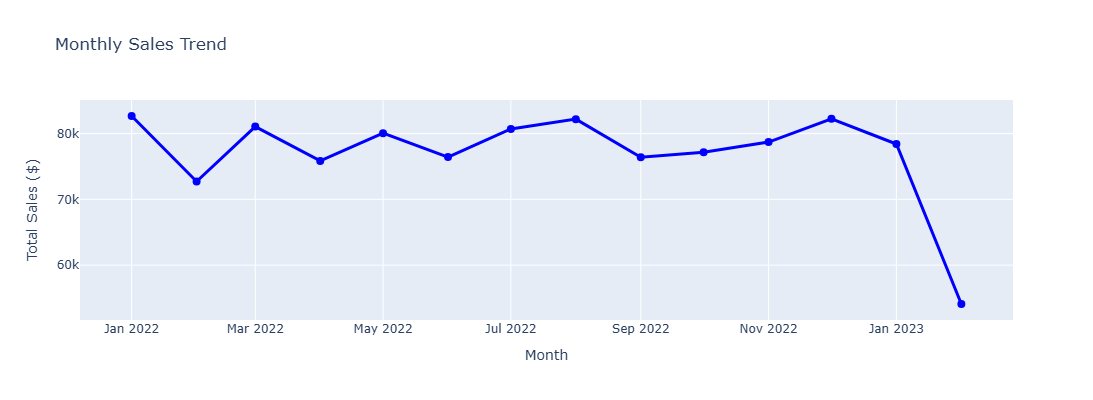


 Sales by Day of Week:
             Total_Sales   Avg_Sales  Order_Count
Day_Name                                         
Monday     157498.615765  109.374039         1440
Tuesday    151707.346597  105.940884         1432
Wednesday  150934.524899  106.592179         1416
Thursday   153164.125513  108.166755         1416
Friday     152703.544595  107.841486         1416
Saturday   156206.797314  108.476943         1440
Sunday     156456.024794  108.650017         1440


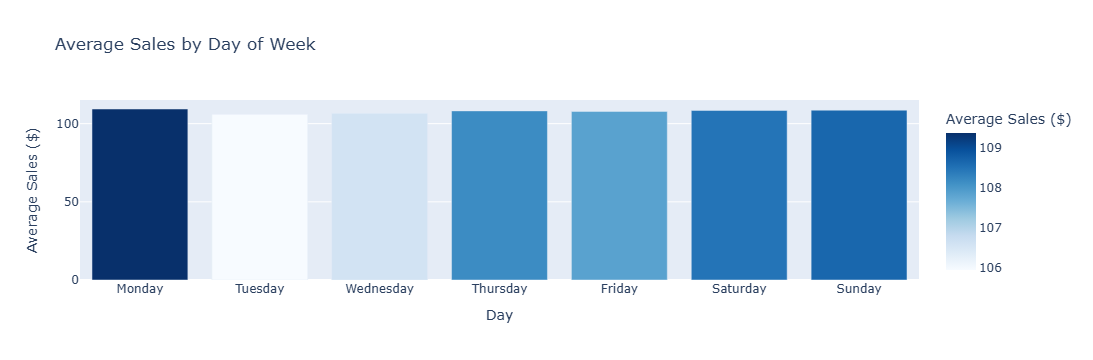


 Weekend vs Weekday Sales:
           Total_Sales   Avg_Sales  Order_Count
Weekday  766008.157368  107.585415         7120
Weekend  312662.822107  108.563480         2880

📈 Weekend Lift: 0.91%

 Seasonal Sales Analysis:
          Total_Sales   Avg_Sales  Order_Count
Season                                        
Spring  236959.739634  107.318723         2208
Summer  239322.129406  108.388646         2208
Fall    232274.586919  106.352833         2184
Winter  370114.523515  108.857213         3400


In [95]:
# TIME SERIES ANALYSIS
# Monthly Sales Trend
if 'Order_Date' in df1.columns and 'Sales' in df1.columns:
    print("\n Monthly Sales Trend:")
    df1['YearMonth'] = df1['Order_Date'].dt.to_period('M')
    monthly_sales = df1.groupby('YearMonth')['Sales'].agg(['sum', 'mean', 'count']).reset_index()
    monthly_sales.columns = ['YearMonth', 'Total_Sales', 'Avg_Order_Value', 'Order_Count']
    monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)
    print(monthly_sales.tail(12))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=monthly_sales['YearMonth'], y=monthly_sales['Total_Sales'],mode='lines+markers',name='Total Sales',
                            line=dict(color='blue', width=3),marker=dict(size=8)))
    fig.update_layout(title='Monthly Sales Trend',xaxis_title='Month',yaxis_title='Total Sales ($)',hovermode='x unified',height=400)
    fig.show()

# Quarterly Analysis
if 'Quarter' in df.columns and 'Year' in df1.columns:
    print("\n Quarterly Sales Analysis:")
    quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()
    
    fig = px.bar(quarterly_sales, x='Quarter', y='Sales', color='Year',title='Quarterly Sales Comparison by Year',
                 barmode='group',labels={'Sales': 'Total Sales ($)', 'Quarter': 'Quarter'})
    fig.show()

# Day of Week Analysis
if 'Day_Name' in df1.columns and 'Sales' in df1.columns:
    print("\n Sales by Day of Week:")
    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_sales = df1.groupby('Day_Name')['Sales'].agg(['sum', 'mean', 'count']).reindex(dow_order)
    dow_sales.columns = ['Total_Sales', 'Avg_Sales', 'Order_Count']
    print(dow_sales)
    
    fig = px.bar(dow_sales.reset_index(), x='Day_Name', y='Avg_Sales',title='Average Sales by Day of Week',
                 labels={'Avg_Sales': 'Average Sales ($)', 'Day_Name': 'Day'},color='Avg_Sales',color_continuous_scale='blues')
    #fig.update_xaxis(categoryorder='array', categoryarray=dow_order)
    fig.show()

# Weekend vs Weekday
if 'Is_Weekend' in df1.columns:
    print("\n Weekend vs Weekday Sales:")
    weekend_sales = df1.groupby('Is_Weekend')['Sales'].agg(['sum', 'mean', 'count'])
    weekend_sales.index = ['Weekday', 'Weekend']
    weekend_sales.columns = ['Total_Sales', 'Avg_Sales', 'Order_Count']
    print(weekend_sales)
    
    # Calculate lift
    weekend_lift = ((weekend_sales.loc['Weekend', 'Avg_Sales'] / 
                    weekend_sales.loc['Weekday', 'Avg_Sales']) - 1) * 100
    print(f"\n📈 Weekend Lift: {weekend_lift:.2f}%")

# Seasonal Analysis
if 'Season' in df1.columns and 'Sales' in df1.columns:
    print("\n Seasonal Sales Analysis:")
    season_order = ['Spring', 'Summer', 'Fall', 'Winter']
    seasonal_sales = df1.groupby('Season')['Sales'].agg(['sum', 'mean', 'count'])
    seasonal_sales = seasonal_sales.reindex(season_order)
    seasonal_sales.columns = ['Total_Sales', 'Avg_Sales', 'Order_Count']
    print(seasonal_sales)


 Customer Purchase Frequency:
Total Unique Customers: 1,986
Average Purchases per Customer: 5.04
Median Purchases per Customer: 5


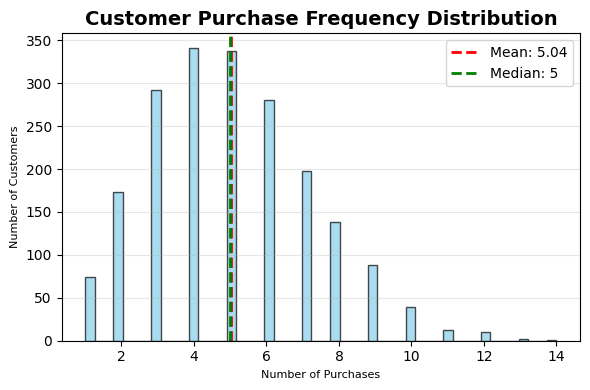

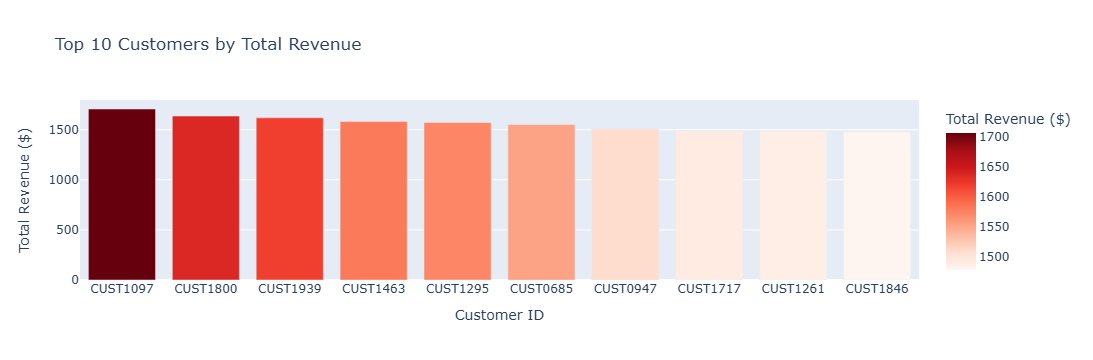


 Customer Retention:
Repeat Customers: 1,912 (96.27%)
One-time Customers: 74 (3.73%)


In [101]:
# CUSTOMER BEHAVIOR ANALYSIS
# Customer Purchase Frequency
if 'Customer_ID' in df1.columns:
    print("\n Customer Purchase Frequency:")
    customer_frequency = df1.groupby('Customer_ID').size().reset_index(name='Purchase_Count')
    
    print(f"Total Unique Customers: {len(customer_frequency):,}")
    print(f"Average Purchases per Customer: {customer_frequency['Purchase_Count'].mean():.2f}")
    print(f"Median Purchases per Customer: {customer_frequency['Purchase_Count'].median():.0f}")
    
    # Distribution
    plt.figure(figsize=(6, 4))
    plt.hist(customer_frequency['Purchase_Count'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title('Customer Purchase Frequency Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Purchases', fontsize=8)
    plt.ylabel('Number of Customers', fontsize=8)
    plt.axvline(customer_frequency['Purchase_Count'].mean(),color='red',linestyle='--', linewidth=2,label=f'Mean: {customer_frequency["Purchase_Count"].mean():.2f}')
    plt.axvline(customer_frequency['Purchase_Count'].median(),color='green',linestyle='--', linewidth=2,label=f'Median: {customer_frequency["Purchase_Count"].median():.0f}')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Top Customers by Revenue
if 'Customer_ID' in df1.columns and 'Sales' in df1.columns:
    top_customers = df1.groupby('Customer_ID')['Sales'].sum().sort_values(ascending=False).head(10)
    
    fig = px.bar(top_customers.reset_index(), x='Customer_ID', y='Sales',title='Top 10 Customers by Total Revenue',
                 labels={'Sales': 'Total Revenue ($)', 'Customer_ID': 'Customer ID'},color='Sales',color_continuous_scale='reds')
    fig.show()

# Customer Retention (Repeat vs One-time)
if 'Is_Repeat_Customer' in df1.columns:
    print("\n Customer Retention:")
    retention = df1.groupby('Customer_ID')['Is_Repeat_Customer'].max()
    repeat_count = retention.sum()
    total_customers = len(retention)
    retention_rate = (repeat_count / total_customers) * 100
    print(f"Repeat Customers: {repeat_count:,} ({retention_rate:.2f}%)")
    print(f"One-time Customers: {total_customers - repeat_count:,} ({100 - retention_rate:.2f}%)")

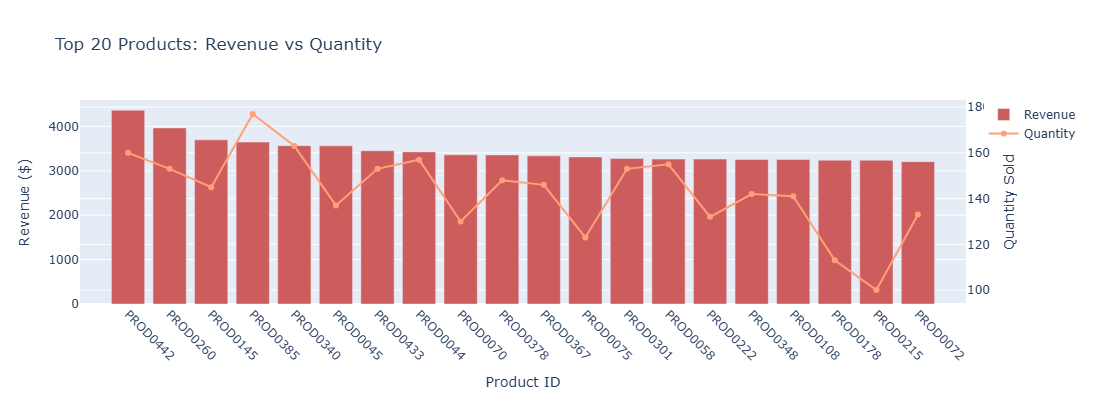

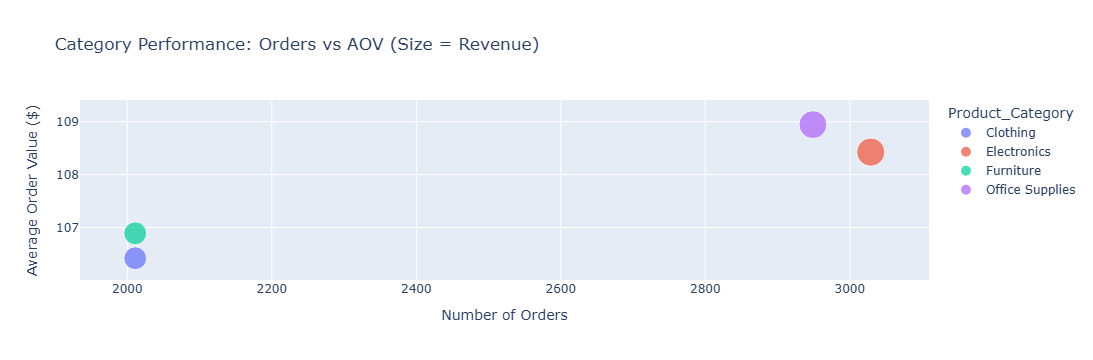

In [112]:
# PRODUCT PERFORMANCE ANALYSIS
# Top Selling Products
if 'Product_ID' in df1.columns and 'Sales' in df1.columns:
    product_performance = df1.groupby('Product_ID').agg({
        'Sales': 'sum',
        'Quantity': 'sum',
        'Order_ID': 'count'
    }).sort_values('Sales', ascending=False).head(20)
    product_performance.columns = ['Total_Revenue', 'Total_Quantity', 'Order_Count']
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x=product_performance.index,y=product_performance['Total_Revenue'],name='Revenue',marker_color='indianred',yaxis='y'))
    fig.add_trace(go.Scatter(x=product_performance.index,y=product_performance['Total_Quantity'],name='Quantity',
        mode='lines+markers',marker_color='lightsalmon',yaxis='y2'))
    fig.update_layout(title='Top 20 Products: Revenue vs Quantity',xaxis=dict(title='Product ID', tickangle=45),yaxis=dict(title='Revenue ($)', 
        side='left'),yaxis2=dict(title='Quantity Sold', overlaying='y', side='right'), hovermode='x unified',height=400)
    fig.show()

# Category Performance Matrix
if 'Product_Category' in df1.columns:
    category_matrix = df1.groupby('Product_Category').agg({
        'Sales': ['sum', 'mean'],
        'Order_ID': 'count',
        'Customer_ID': 'nunique'
    })
    category_matrix.columns = ['Total_Sales', 'Avg_Order_Value', 'Order_Count', 'Unique_Customers']
    category_matrix['Revenue_Share'] = (category_matrix['Total_Sales'] / category_matrix['Total_Sales'].sum() * 100).round(2)
    
    fig = px.scatter(category_matrix.reset_index(), x='Order_Count', y='Avg_Order_Value', size='Total_Sales', color='Product_Category',
                     title='Category Performance: Orders vs AOV (Size = Revenue)',
                     labels={'Order_Count': 'Number of Orders', 'Avg_Order_Value': 'Average Order Value ($)'},
                     hover_data=['Total_Sales', 'Unique_Customers'])
    fig.show()

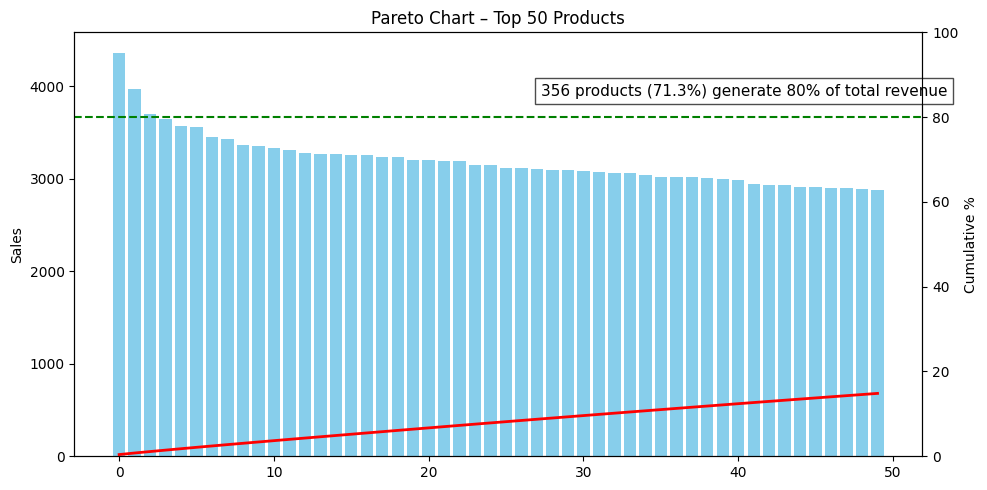

In [118]:
if 'Product_ID' in df1.columns and 'Sales' in df1.columns:
    product_sales = df1.groupby('Product_ID')['Sales'].sum().sort_values(ascending=False)
    cumulative_pct = product_sales.cumsum() / product_sales.sum() * 100
    # top 50 products for clarity
    top_n = 50
    product_sales_top = product_sales.head(top_n)
    cumulative_pct_top = cumulative_pct.head(top_n)
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax1.bar(range(top_n), product_sales_top, color='skyblue')
    ax1.set_ylabel('Sales')
    ax1.set_title('Pareto Chart – Top 50 Products')
    ax2 = ax1.twinx()
    ax2.plot(range(top_n), cumulative_pct_top, color='red', linewidth=2)
    ax2.axhline(80, color='green', linestyle='--')
    ax2.set_ylabel('Cumulative %')
    ax2.set_ylim(0,100)
    insight_text = f"{top_80} products ({pct_products:.1f}%) generate 80% of total revenue"
    ax1.text(0.55, 0.85, insight_text,transform=ax1.transAxes, fontsize=11,bbox=dict(facecolor='white', alpha=0.7))
    plt.tight_layout()
    plt.show()

This Pareto chart shows that revenue is not concentrated in a small number of products. Even the top 50 products contribute only a small portion of total revenue, indicating a diversified sales distribution across many products.

In [121]:
# KEY FINDINGS FROM EDA
findings = []
# Finding 1: Top category
if 'Product_Category' in df1.columns:
    top_category = df1.groupby('Product_Category')['Sales'].sum().idxmax()
    top_category_pct = (df1.groupby('Product_Category')['Sales'].sum().max() / df1['Sales'].sum() * 100)
    findings.append(f"1. {top_category} is the top category, generating {top_category_pct:.1f}% of total revenue")

# Finding 2: Customer retention
if 'Customer_ID' in df1.columns:
    customer_freq = df1.groupby('Customer_ID').size()
    repeat_customers = (customer_freq > 1).sum()
    total_customers = len(customer_freq)
    retention_rate = (repeat_customers / total_customers * 100)
    findings.append(f"2. Customer retention rate is {retention_rate:.1f}% ({repeat_customers:,} of {total_customers:,} customers)")

# Finding 3: Seasonality
if 'Quarter' in df1.columns:
    quarterly_sales = df1.groupby('Quarter')['Sales'].sum()
    peak_quarter = quarterly_sales.idxmax()
    peak_pct = (quarterly_sales.max() / quarterly_sales.sum() * 100)
    findings.append(f"3. Q{peak_quarter} is the peak quarter, accounting for {peak_pct:.1f}% of annual sales")

# Finding 4: Weekend effect
if 'Is_Weekend' in df1.columns:
    weekend_avg = df1[df1['Is_Weekend'] == 1]['Sales'].mean()
    weekday_avg = df1[df1['Is_Weekend'] == 0]['Sales'].mean()
    lift = ((weekend_avg / weekday_avg - 1) * 100)
    findings.append(f"4. Weekend sales are {abs(lift):.1f}% {'higher' if lift > 0 else 'lower'} than weekday sales")

# Finding 5: Product concentration
if 'Product_ID' in df1.columns:
    product_sales = df1.groupby('Product_ID')['Sales'].sum().sort_values(ascending=False)
    top_20_pct = int(len(product_sales) * 0.2)
    top_20_revenue_pct = (product_sales.head(top_20_pct).sum() / product_sales.sum() * 100)
    findings.append(f"5. Top 20% of products generate {top_20_revenue_pct:.1f}% of revenue, indicating revenue is distributed across many products.")

for finding in findings:
    print(f"\n{finding}")


1. Electronics is the top category, generating 30.4% of total revenue

2. Customer retention rate is 96.3% (1,912 of 1,986 customers)

3. Q1 is the peak quarter, accounting for 34.2% of annual sales

4. Weekend sales are 0.9% higher than weekday sales

5. Top 20% of products generate 27.3% of revenue, indicating revenue is distributed across many products.


# PART 4: Advanced Analytics

Analysis Date: 2023-02-22
RFM Metrics Calculated for 1,986 customers

RFM Summary Statistics:
           Recency    Frequency     Monetary
count  1986.000000  1986.000000  1986.000000
mean     81.605740     5.035247   543.137452
std      77.074769     2.256983   282.191515
min       1.000000     1.000000    13.521954
25%      24.000000     3.000000   330.710807
50%      58.000000     5.000000   516.372006
75%     114.000000     6.000000   716.082448
max     408.000000    14.000000  1706.776827


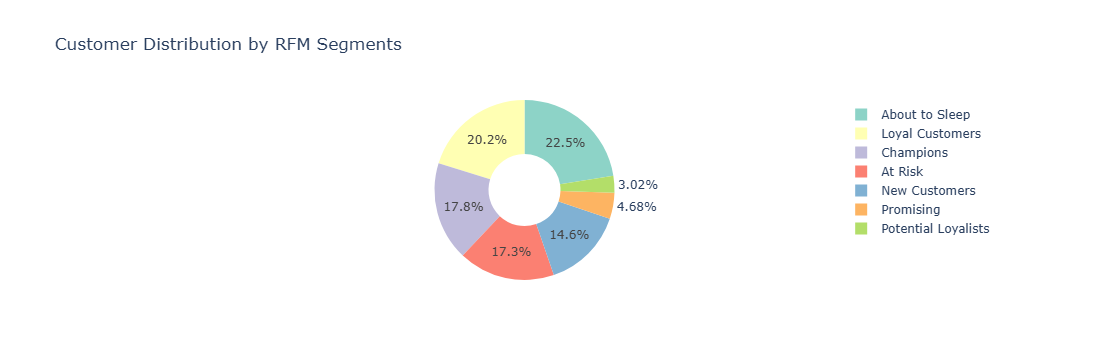

,Avg_Recency,Avg_Frequency,Avg_Monetary,Revenue_Contribution (%)
Customer_Segment,,,,
About to Sleep,176.19,2.76,297.07,12.28
At Risk,128.61,5.88,634.23,20.23
Champions,19.44,7.70,856.46,28.03
Loyal Customers,42.94,6.18,681.87,25.35
New Customers,37.81,2.98,294.18,7.88
Potential Loyalists,21.85,3.82,549.68,3.06
Promising,31.48,4.96,368.21,3.17


In [136]:
# RFM ANALYSIS
# Set analysis date (day after last transaction)
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'], errors='coerce')

analysis_date = df1['Order_Date'].max() + timedelta(days=1)
print(f"Analysis Date: {analysis_date.date()}")

# Calculate RFM metrics for each customer
rfm = df1.groupby('Customer_ID').agg({
    'Order_Date': lambda x: (analysis_date - x.max()).days,  # Recency
    'Order_ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']
print(f"RFM Metrics Calculated for {len(rfm):,} customers")
print("\nRFM Summary Statistics:")
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())

# RFM scores (1-5 scale, where 5 is best)
# Recency Score (lower is better, means recent customer, which is good so reverse)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

rfm['RFM_Score'] = (rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str))
rfm['RFM_Score_Numeric'] = (rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)) / 3

# Customer Segmentation based on RFM
def segment_customers(row):
    """Segment customers based on RFM scores"""
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    
    # Champions: Best customers
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    # Loyal Customers: Buy regularly
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    # Potential Loyalists: Recent customers with potential
    elif r >= 4 and f <= 2 and m >= 3:
        return 'Potential Loyalists'
    # New Customers: Recent first-time buyers
    elif r >= 3 and f <= 2:
        return 'New Customers'
    # Promising: Recent but low spenders
    elif r >= 3 and m <= 2:
        return 'Promising'
    # Need Attention: Above average recency, frequency, and monetary
    elif r == 3 and f == 3 and m == 3:
        return 'Need Attention'
    # About to Sleep: Below average engagement
    elif r <= 2 and f <= 2:
        return 'About to Sleep'
    # At Risk: Used to be good, now declining
    elif r <= 2 and f >= 3:
        return 'At Risk'
    # Can't Lose Them: Were best customers but churning
    elif r <= 2 and f >= 4 and m >= 4:
        return "Can't Lose Them"
    # Lost: Long time since purchase
    elif r == 1:
        return 'Lost'
    else:
        return 'Others'

rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)
fig = px.pie(rfm['Customer_Segment'].value_counts().reset_index(), values='count', names='Customer_Segment',
             title='Customer Distribution by RFM Segments',hole=0.4,color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()
# RFM Summary by Segment
rfm_summary = rfm.groupby('Customer_Segment').agg(
    Avg_Recency=('Recency', 'mean'),
    Avg_Frequency=('Frequency', 'mean'),
    Avg_Monetary=('Monetary', 'mean'),
    Total_Revenue=('Monetary', 'sum')).round(2)

rfm_summary['Revenue_Contribution (%)'] = (rfm_summary['Total_Revenue'] / rfm_summary['Total_Revenue'].sum() * 100).round(2)
rfm_summary.drop(columns=['Total_Revenue'], inplace=True)
display(rfm_summary)

# rfm.to_csv("rfm_analysis.csv", index=False)


Features for clustering: ['Recency', 'Frequency', 'Monetary']
Data shape: (1986, 3)


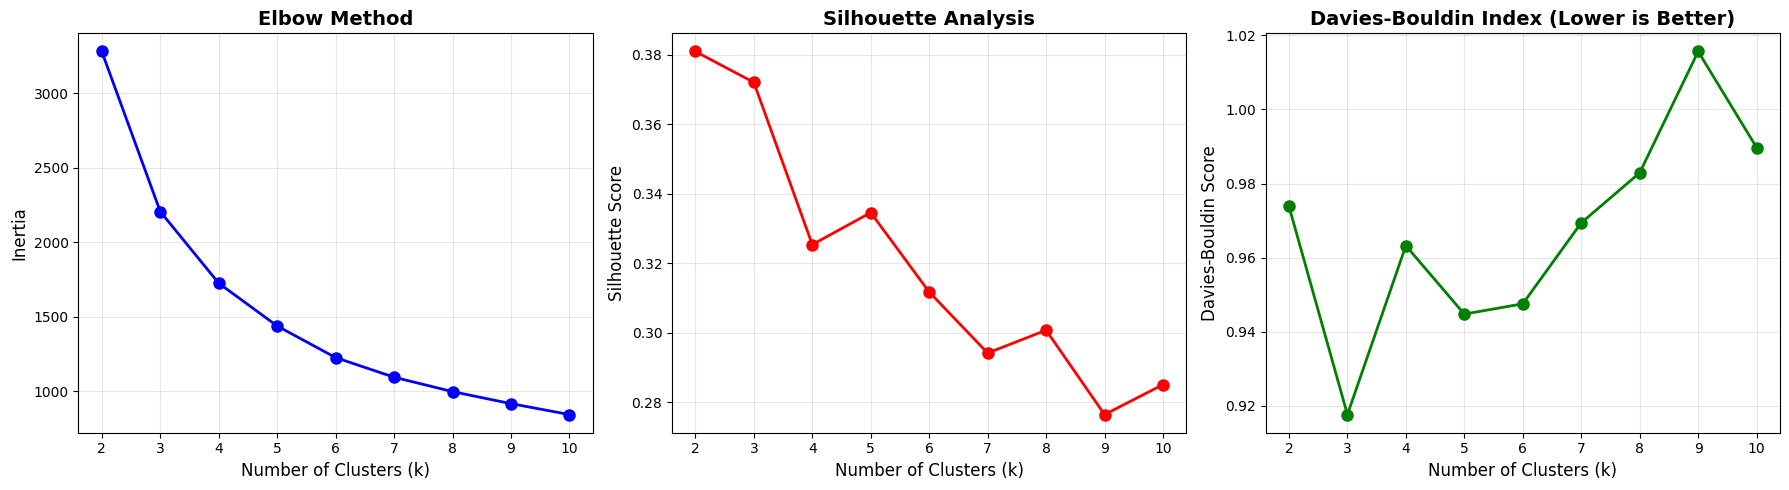


 Optimal k based on Silhouette Score: 2

 Applying K-Means with k=2...
  - Silhouette Score: 0.3810
  - Davies-Bouldin Score: 0.9739


In [138]:
# K-MEANS CLUSTERING
clustering_features = ['Recency', 'Frequency', 'Monetary']
X = rfm[clustering_features].values
print(f"\nFeatures for clustering: {clustering_features}")
print(f"Data shape: {X.shape}")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Determine optimal number of clusters using Elbow Method and Silhouette Score

inertias = []
silhouette_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Plot evaluation metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
# Davies-Bouldin Score (lower is better)
axes[2].plot(K_range, davies_bouldin_scores, 'go-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[2].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[2].set_title('Davies-Bouldin Index (Lower is Better)', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose optimal k (typically where silhouette score is highest and elbow occurs)
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n Optimal k based on Silhouette Score: {optimal_k}")
# Apply K-Means with optimal k
print(f"\n Applying K-Means with k={optimal_k}...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
rfm['Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"  - Silhouette Score: {silhouette_score(X_scaled, rfm['Cluster']):.4f}")
print(f"  - Davies-Bouldin Score: {davies_bouldin_score(X_scaled, rfm['Cluster']):.4f}")

In [144]:
# CLUSTER PROFILING AND CHARACTERIZATION
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'Customer_ID': 'count'}).round(2)

cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.rename(columns={'Customer_ID_count': 'Customer_Count'})
cluster_summary['Customer_Percentage'] = (cluster_summary['Customer_Count'] / cluster_summary['Customer_Count'].sum() * 100).round(2)

# Name clusters based on characteristics
def name_cluster_characteristics(cluster_data):
    """Assign meaningful names to clusters"""
    names = {}
    for cluster_id in cluster_data.index:
        r_mean = cluster_data.loc[cluster_id, 'Recency_mean']
        f_mean = cluster_data.loc[cluster_id, 'Frequency_mean']
        m_mean = cluster_data.loc[cluster_id, 'Monetary_mean']
        
        # Define thresholds (adjust based on your data)
        r_threshold = cluster_data['Recency_mean'].median()
        f_threshold = cluster_data['Frequency_mean'].median()
        m_threshold = cluster_data['Monetary_mean'].median()
        
        if r_mean < r_threshold and f_mean > f_threshold and m_mean > m_threshold:
            names[cluster_id] = 'VIP Customers'
        elif f_mean > f_threshold and m_mean > m_threshold:
            names[cluster_id] = 'High Value'
        elif r_mean < r_threshold and f_mean <= f_threshold:
            names[cluster_id] = 'Potential'
        else:
            names[cluster_id] = 'At Risk'
    
    return names
cluster_names = name_cluster_characteristics(cluster_summary)
rfm['Cluster_Name'] = rfm['Cluster'].map(cluster_names)

for cluster_id, name in cluster_names.items():
    count = cluster_summary.loc[cluster_id, 'Customer_Count']
    pct = cluster_summary.loc[cluster_id, 'Customer_Percentage']
    print(f"  Cluster {cluster_id}: {name} ({count:.0f} customers, {pct:.1f}%)")

# Detailed profiling report
print("\n DETAILED CLUSTER PROFILES ")
for cluster_id, cluster_name in cluster_names.items():
    cluster_data = rfm[rfm['Cluster'] == cluster_id]
    total_revenue = cluster_data['Monetary'].sum()
    revenue_share = (total_revenue / rfm['Monetary'].sum() * 100)
    print(f"\nCLUSTER {cluster_id}: {cluster_name}")
    print(f"Size: {len(cluster_data):,} customers ({len(cluster_data)/len(rfm)*100:.1f}%)")
    print(f"\nRFM Metrics:")
    print(f"  • Avg Recency: {cluster_data['Recency'].mean():.1f} days")
    print(f"  • Avg Frequency: {cluster_data['Frequency'].mean():.1f} orders")
    print(f"  • Avg Monetary: ${cluster_data['Monetary'].mean():,.2f}")
    print(f"  • Total Revenue: ${total_revenue:,.2f} ({revenue_share:.1f}% of total)")
    
    print(f"\nRecommended Marketing Actions:")
    if cluster_name == 'VIP Customers':
        print("  ✓ Exclusive rewards and early access to new products")
        print("  ✓ Personalized communication and dedicated support")
        print("  ✓ Premium tier membership programs")
        print("  ✓ Referral incentives")
    elif cluster_name == 'High Value':
        print("  ✓ Loyalty programs with tiered benefits")
        print("  ✓ Cross-sell and upsell campaigns")
        print("  ✓ Regular engagement through email marketing")
        print("  ✓ Special occasion offers")
    elif cluster_name == 'Potential':
        print("  ✓ Nurture with targeted promotions")
        print("  ✓ Product recommendations based on browsing")
        print("  ✓ Time-limited offers to encourage repeat purchase")
        print("  ✓ Educational content about products")
    else:  # At Risk
        print("  ✓ Win-back campaigns with special discounts")
        print("  ✓ Survey to understand reasons for churn")
        print("  ✓ Re-engagement through personalized content")
        print("  ✓ Abandoned cart reminders")

# Save cluster profiling
#rfm.to_csv('customer_segments.csv', index=False)

  Cluster 0: VIP Customers (924 customers, 46.5%)
  Cluster 1: At Risk (1062 customers, 53.5%)

 DETAILED CLUSTER PROFILES 

CLUSTER 0: VIP Customers
Size: 924 customers (46.5%)

RFM Metrics:
  • Avg Recency: 45.8 days
  • Avg Frequency: 6.9 orders
  • Avg Monetary: $772.36
  • Total Revenue: $713,663.99 (66.2% of total)

Recommended Marketing Actions:
  ✓ Exclusive rewards and early access to new products
  ✓ Personalized communication and dedicated support
  ✓ Premium tier membership programs
  ✓ Referral incentives

CLUSTER 1: At Risk
Size: 1,062 customers (53.5%)

RFM Metrics:
  • Avg Recency: 112.8 days
  • Avg Frequency: 3.4 orders
  • Avg Monetary: $343.70
  • Total Revenue: $365,006.99 (33.8% of total)

Recommended Marketing Actions:
  ✓ Win-back campaigns with special discounts
  ✓ Survey to understand reasons for churn
  ✓ Re-engagement through personalized content
  ✓ Abandoned cart reminders



PCA Explained Variance:
  PC1: 70.72%
  PC2: 24.52%
  Total: 95.24%


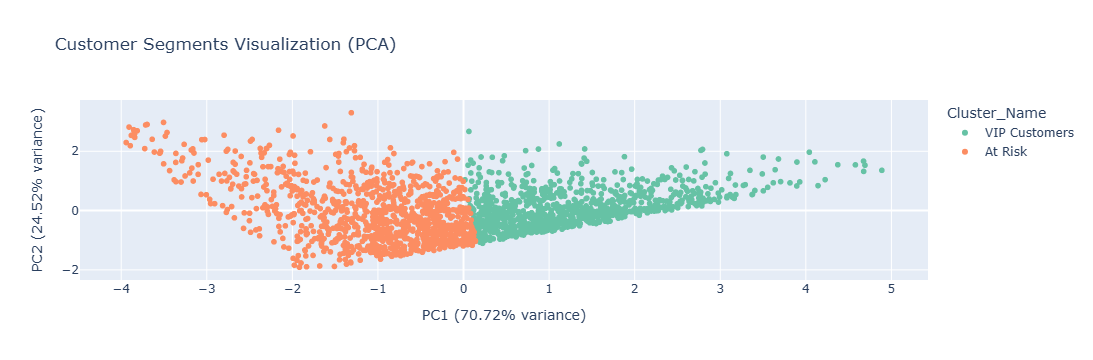

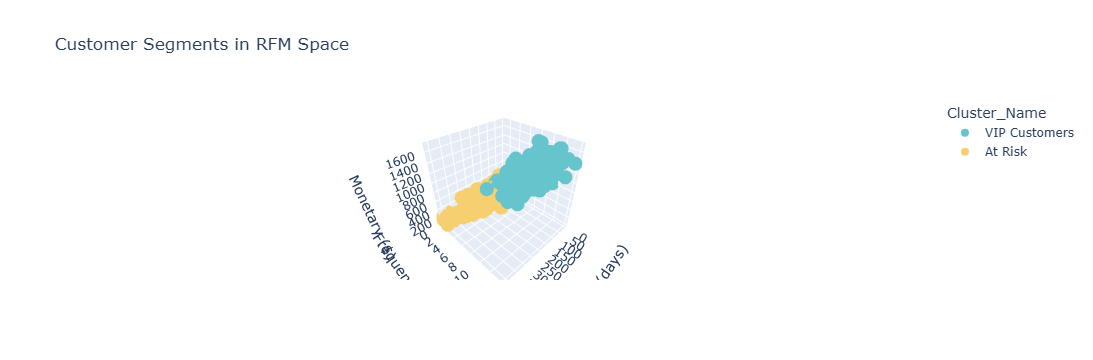

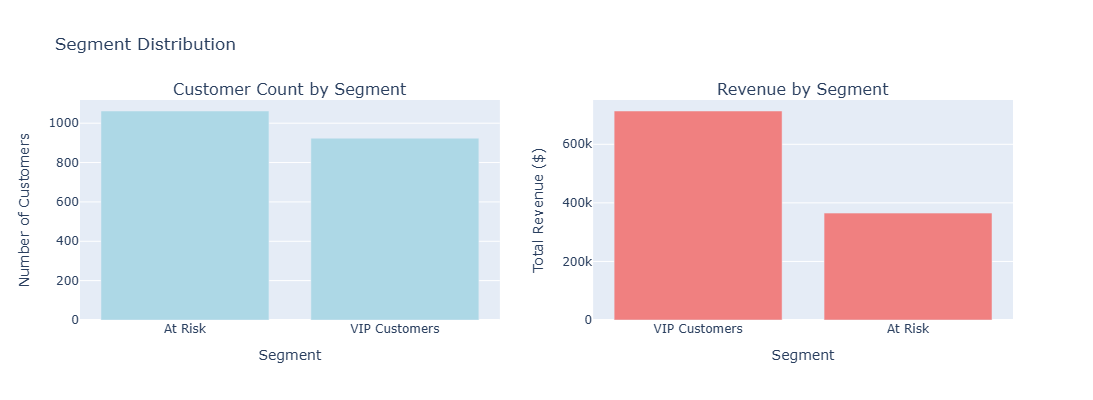

In [145]:
# CLUSTER VISUALIZATION
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

rfm['PCA1'] = X_pca[:, 0]
rfm['PCA2'] = X_pca[:, 1]
explained_var = pca.explained_variance_ratio_
print(f"\nPCA Explained Variance:")
print(f"  PC1: {explained_var[0]*100:.2f}%")
print(f"  PC2: {explained_var[1]*100:.2f}%")
print(f"  Total: {sum(explained_var)*100:.2f}%")

# 2D Scatter plot
fig = px.scatter(rfm, x='PCA1', y='PCA2', color='Cluster_Name',title='Customer Segments Visualization (PCA)',
                 labels={'PCA1': f'PC1 ({explained_var[0]:.2%} variance)', 'PCA2': f'PC2 ({explained_var[1]:.2%} variance)'},
                 hover_data=['Recency', 'Frequency', 'Monetary', 'Customer_ID'],color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()
# 3D visualization in RFM space
fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary',color='Cluster_Name',title='Customer Segments in RFM Space',
                    labels={'Recency': 'Recency (days)', 'Frequency': 'Frequency (orders)','Monetary': 'Monetary ($)'},
                    hover_data=['Customer_ID'], color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

# Segment size and revenue contribution
fig = make_subplots(rows=1, cols=2, subplot_titles=('Customer Count by Segment', 'Revenue by Segment'),specs=[[{'type': 'bar'}, {'type': 'bar'}]])
segment_counts = rfm['Cluster_Name'].value_counts()
segment_revenue = rfm.groupby('Cluster_Name')['Monetary'].sum().sort_values(ascending=False)

fig.add_trace(go.Bar(x=segment_counts.index, y=segment_counts.values, name='Customers', marker_color='lightblue'), row=1, col=1)
fig.add_trace(go.Bar(x=segment_revenue.index, y=segment_revenue.values, name='Revenue', marker_color='lightcoral'), row=1, col=2)
fig.update_xaxes(title_text="Segment", row=1, col=1)
fig.update_xaxes(title_text="Segment", row=1, col=2)
fig.update_yaxes(title_text="Number of Customers", row=1, col=1)
fig.update_yaxes(title_text="Total Revenue ($)", row=1, col=2)
fig.update_layout(height=400, showlegend=False, title_text="Segment Distribution")
fig.show()


Total Cohorts: 14

Cohort Sizes:
Cohort
2022-10    27
2022-11    25
2022-12     9
2023-01    11
2023-02     6
Freq: M, Name: Customer_ID, dtype: int64

 Cohort Retention Rates (%):
Cohort_Index     0          1          2          3          4          5   \
Cohort                                                                       
2022-01       100.0  26.821192  31.622517  29.139073  31.125828  32.615894   
2022-02       100.0  30.886076  28.860759  28.354430  35.443038  29.620253   
2022-03       100.0  31.615120  32.302405  30.927835  32.646048  28.522337   
2022-04       100.0  32.352941  24.019608  29.901961  31.372549  27.450980   
2022-05       100.0  34.074074  28.888889  32.592593  25.925926  34.074074   

Cohort_Index         6          7          8          9          10  \
Cohort                                                                
2022-01       30.463576  31.291391  26.324503  31.953642  29.635762   
2022-02       30.379747  34.683544  31.645570  33.670886  

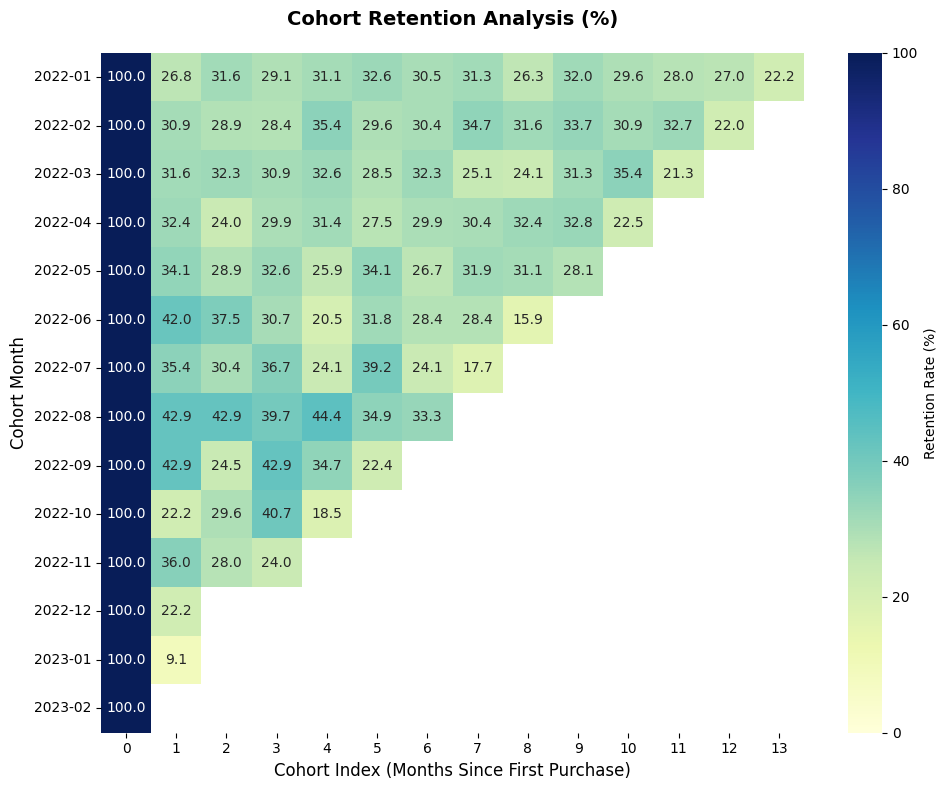

In [148]:
# COHORT ANALYSIS
# Create cohort data
df_cohort = df.copy()
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

df_cohort['Order_Month'] = df_cohort['Order_Date'].dt.to_period('M')
df_cohort['Cohort'] = df_cohort.groupby('Customer_ID')['Order_Date'].transform('min').dt.to_period('M')

# Calculate cohort index (months since first purchase)
def get_cohort_period(df):
    df['Cohort_Index'] = (df['Order_Month'] - df['Cohort']).apply(lambda x: x.n)
    return df
df_cohort = get_cohort_period(df_cohort)
cohort_size = df_cohort.groupby('Cohort')['Customer_ID'].nunique()
print(f"\nTotal Cohorts: {len(cohort_size)}")
print("\nCohort Sizes:")
print(cohort_size.tail())

retention = df_cohort.groupby(['Cohort', 'Cohort_Index'])['Customer_ID'].nunique().reset_index()
retention_matrix = retention.pivot(index='Cohort', columns='Cohort_Index', values='Customer_ID')
retention_rate = retention_matrix.divide(cohort_size, axis=0) * 100
print("\n Cohort Retention Rates (%):")
print(retention_rate.head())

plt.figure(figsize=(10, 8))
sns.heatmap(retention_rate, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Retention Rate (%)'}, vmin=0, vmax=100)
plt.title('Cohort Retention Analysis (%)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cohort Index (Months Since First Purchase)', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.tight_layout()
plt.show()

# retention_rate.to_csv('cohort_retention.csv')

The cohort analysis shows that customer retention stabilizes around 25–35% across most cohorts, with some mid-year cohorts showing stronger retention near 40%, indicating effective customer engagement during those periods.

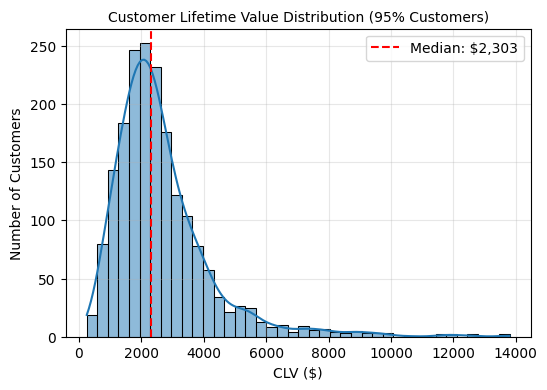


 CLV Summary by Category:
              Customer_Count   Avg_CLV  Total_Revenue  Avg_Orders
CLV_Category                                                     
Low                      497   1245.07      162678.28        3.87
Medium                   496   2045.70      262270.23        5.12
High                     496   2812.97      345584.06        6.16
Very High                497  24426.72      328664.60        5.00


In [161]:
# CUSTOMER LIFETIME VALUE (CLV)
# Calculate CLV components
customer_metrics = df.groupby('Customer_ID').agg({
    'Sales': 'sum',
    'Order_ID': 'count',
    'Order_Date': ['min', 'max']}).reset_index()
customer_metrics.columns = ['Customer_ID', 'Total_Revenue', 'Order_Count', 'First_Purchase', 'Last_Purchase']
customer_metrics['First_Purchase'] = pd.to_datetime(customer_metrics['First_Purchase'])
customer_metrics['Last_Purchase'] = pd.to_datetime(customer_metrics['Last_Purchase'])
customer_metrics['Lifespan_Days'] = (customer_metrics['Last_Purchase'] - customer_metrics['First_Purchase']).dt.days
customer_metrics['Lifespan_Days'] = customer_metrics['Lifespan_Days'].replace(0, 1)  # Avoid division by zero
customer_metrics['Avg_Order_Value'] = customer_metrics['Total_Revenue'] / customer_metrics['Order_Count']
customer_metrics['Purchase_Frequency'] = customer_metrics['Order_Count'] / (customer_metrics['Lifespan_Days'] / 365.25)

# CLV = Average Order Value × Purchase Frequency × Average Customer Lifespan (in years)
avg_customer_lifespan_years = 3  # Assumption
customer_metrics['CLV_Simple'] = (customer_metrics['Avg_Order_Value'] * customer_metrics['Purchase_Frequency'] * avg_customer_lifespan_years)
#print(customer_metrics['CLV_Simple'].describe())

# Categorize customers by CLV
customer_metrics['CLV_Category'] = pd.qcut(customer_metrics['CLV_Simple'], q=4,labels=['Low', 'Medium', 'High', 'Very High'],duplicates='drop')
plt.figure(figsize=(6,4))
sns.histplot(filtered['CLV_Simple'], bins=40, kde=True)
plt.title("Customer Lifetime Value Distribution (95% Customers)", fontsize=10)
plt.xlabel("CLV ($)")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.3)
plt.axvline(filtered['CLV_Simple'].median(), color='red', linestyle='--',label=f"Median: ${filtered['CLV_Simple'].median():,.0f}")
plt.legend()
plt.show()
# CLV by segment
clv_by_category = customer_metrics.groupby('CLV_Category').agg({
    'Customer_ID': 'count',
    'CLV_Simple': 'mean',
    'Total_Revenue': 'sum',
    'Order_Count': 'mean'}).round(2)
clv_by_category.columns = ['Customer_Count', 'Avg_CLV', 'Total_Revenue', 'Avg_Orders']

print("\n CLV Summary by Category:")
print(clv_by_category)

#customer_metrics.to_csv('customer_clv.csv', index=False)

# PART 5: KPI & Reporting

In [162]:
rfm = pd.read_csv('customer_segments.csv')
customer_clv = pd.read_csv('customer_clv.csv')
print("KPI DESIGN AND DASHBOARD PREPARATION")
print(f"\nSales Data: {df1.shape}")
print(f"Customer Segments: {rfm.shape}")
print(f"CLV Data: {customer_clv.shape}")

# Initialize KPI dictionary
kpis = {}
print("\n💰 REVENUE METRICS")
kpis['Total_Revenue'] = df1['Sales'].sum()
kpis['Total_Orders'] = df1['Order_ID'].nunique()
kpis['Avg_Order_Value'] = df1.groupby('Order_ID')['Sales'].sum().mean()
kpis['Total_Units_Sold'] = df1['Quantity'].sum()
if 'Profit' in df1.columns:
    kpis['Total_Profit'] = df1['Profit'].sum()
    kpis['Profit_Margin_Pct'] = (kpis['Total_Profit'] / kpis['Total_Revenue']) * 100
else:
    # Assume 25% profit margin
    kpis['Total_Profit'] = kpis['Total_Revenue'] * 0.25
    kpis['Profit_Margin_Pct'] = 25.0
print(f"Total Revenue: ${kpis['Total_Revenue']:,.2f}")
print(f"Total Orders: {kpis['Total_Orders']:,}")
print(f"Avg Order Value (AOV): ${kpis['Avg_Order_Value']:,.2f}")
print(f"Total Units Sold: {kpis['Total_Units_Sold']:,}")
print(f"Total Profit: ${kpis['Total_Profit']:,.2f}")
print(f"Profit Margin: {kpis['Profit_Margin_Pct']:.2f}%")

print("\n👥 CUSTOMER METRICS")
kpis['Total_Customers'] = df1['Customer_ID'].nunique()
kpis['Revenue_Per_Customer'] = kpis['Total_Revenue'] / kpis['Total_Customers']
kpis['Avg_Orders_Per_Customer'] = kpis['Total_Orders'] / kpis['Total_Customers']
customer_order_counts = df1.groupby('Customer_ID')['Order_ID'].nunique()
repeat_customers = (customer_order_counts > 1).sum()
kpis['Repeat_Customers'] = repeat_customers
kpis['Repeat_Customer_Rate'] = (repeat_customers / kpis['Total_Customers']) * 100
kpis['One_Time_Customers'] = kpis['Total_Customers'] - repeat_customers
print(f"Total Customers: {kpis['Total_Customers']:,}")
print(f"Revenue Per Customer: ${kpis['Revenue_Per_Customer']:,.2f}")
print(f"Avg Orders Per Customer: {kpis['Avg_Orders_Per_Customer']:.2f}")
print(f"Repeat Customers: {kpis['Repeat_Customers']:,} ({kpis['Repeat_Customer_Rate']:.2f}%)")
print(f"One-Time Customers: {kpis['One_Time_Customers']:,}")

print("\n📦 PRODUCT METRICS")
kpis['Total_SKUs'] = df1['Product_ID'].nunique()
kpis['Avg_Items_Per_Order'] = df1.groupby('Order_ID')['Quantity'].sum().mean()
kpis['Total_Categories'] = df1['Product_Category'].nunique() if 'Product_Category' in df1.columns else 0
print(f"Total SKUs: {kpis['Total_SKUs']:,}")
print(f"Avg Items Per Order: {kpis['Avg_Items_Per_Order']:.2f}")
print(f"Total Categories: {kpis['Total_Categories']}")

print("\n💎 CLV & MARKETING METRICS")
kpis['Avg_Customer_Lifetime_Value'] = customer_clv['CLV_Simple'].mean()
kpis['Customer_Acquisition_Cost'] = 50  # Assumption: $50 per customer
kpis['CLV_to_CAC_Ratio'] = kpis['Avg_Customer_Lifetime_Value'] / kpis['Customer_Acquisition_Cost']
kpis['Profit_Per_Customer'] = kpis['Total_Profit'] / kpis['Total_Customers']
avg_monthly_revenue_per_customer = kpis['Revenue_Per_Customer'] / 12  # Assuming yearly revenue
kpis['CAC_Payback_Months'] = kpis['Customer_Acquisition_Cost'] / (avg_monthly_revenue_per_customer * 0.25)  # 25% margin
print(f"Avg Customer Lifetime Value: ${kpis['Avg_Customer_Lifetime_Value']:,.2f}")
print(f"Customer Acquisition Cost (CAC): ${kpis['Customer_Acquisition_Cost']:,.2f}")
print(f"CLV to CAC Ratio: {kpis['CLV_to_CAC_Ratio']:.2f}x")
print(f"Profit Per Customer: ${kpis['Profit_Per_Customer']:,.2f}")
print(f"CAC Payback Period: {kpis['CAC_Payback_Months']:.1f} months")

print("\n🔄 RETENTION & CHURN METRICS")
# Calculate churn (customers inactive > 180 days)
if 'Recency' in rfm.columns:
    churned_customers = (rfm['Recency'] > 180).sum()
    kpis['Churned_Customers'] = churned_customers
    kpis['Churn_Rate'] = (churned_customers / len(rfm)) * 100
    kpis['Retention_Rate'] = 100 - kpis['Churn_Rate']
    print(f"Churned Customers (>180 days): {kpis['Churned_Customers']:,}")
    print(f"Churn Rate: {kpis['Churn_Rate']:.2f}%")
    print(f"Retention Rate: {kpis['Retention_Rate']:.2f}%")
if 'Recency' in rfm.columns:
    kpis['Avg_Days_Since_Purchase'] = rfm['Recency'].mean()
    print(f"Avg Days Since Last Purchase: {kpis['Avg_Days_Since_Purchase']:.1f}")

print("\n📅 TIME-BASED METRICS")
kpis['Analysis_Start_Date'] = df1['Order_Date'].min().date()
kpis['Analysis_End_Date'] = df1['Order_Date'].max().date()
kpis['Analysis_Period_Days'] = (df1['Order_Date'].max() - df1['Order_Date'].min()).days
print(f"Analysis Period: {kpis['Analysis_Start_Date']} to {kpis['Analysis_End_Date']}")
print(f"Total Days: {kpis['Analysis_Period_Days']}")
kpis['Avg_Daily_Revenue'] = kpis['Total_Revenue'] / kpis['Analysis_Period_Days']
kpis['Avg_Daily_Orders'] = kpis['Total_Orders'] / kpis['Analysis_Period_Days']
print(f"Avg Daily Revenue: ${kpis['Avg_Daily_Revenue']:,.2f}")
print(f"Avg Daily Orders: {kpis['Avg_Daily_Orders']:.1f}")

print("\n🎯 SEGMENTATION METRICS")
if 'Cluster_Name' in rfm.columns:
    segment_counts = rfm['Cluster_Name'].value_counts()
    for segment, count in segment_counts.items():
        pct = (count / len(rfm)) * 100
        kpis[f'{segment}_Count'] = count
        kpis[f'{segment}_Percentage'] = pct
        print(f"{segment}: {count:,} ({pct:.1f}%)")

print("PREPARING KPI DASHBOARD DATA")
kpi_df = pd.DataFrame(list(kpis.items()), columns=['KPI', 'Value'])
#kpi_df.to_csv('kpi_summary.csv', index=False)

df1['YearMonth'] = df1['Order_Date'].dt.to_period('M')
monthly_kpis = df1.groupby('YearMonth').agg({
    'Sales': 'sum',
    'Order_ID': 'nunique',
    'Customer_ID': 'nunique',
    'Quantity': 'sum',
    'Product_ID': 'nunique'}).reset_index()
monthly_kpis.columns = ['YearMonth', 'Revenue', 'Orders', 'Customers', 'Units_Sold', 'SKUs']
monthly_kpis['AOV'] = monthly_kpis['Revenue'] / monthly_kpis['Orders']
monthly_kpis['Revenue_Per_Customer'] = monthly_kpis['Revenue'] / monthly_kpis['Customers']
monthly_kpis['Items_Per_Order'] = monthly_kpis['Units_Sold'] / monthly_kpis['Orders']
monthly_kpis['Revenue_Growth'] = monthly_kpis['Revenue'].pct_change() * 100
monthly_kpis['Customer_Growth'] = monthly_kpis['Customers'].pct_change() * 100
monthly_kpis['Order_Growth'] = monthly_kpis['Orders'].pct_change() * 100
monthly_kpis['YearMonth'] = monthly_kpis['YearMonth'].astype(str)
print(f"✓ Monthly KPIs for {len(monthly_kpis)} months")
print("\nLast 6 Months:")
print(monthly_kpis.tail(6).round(2))

if 'Product_Category' in df1.columns:
    print("\n📦 Calculating Category-Level KPIs...")
    category_kpis = df1.groupby('Product_Category').agg({
        'Sales': ['sum', 'mean'],
        'Order_ID': 'nunique',
        'Customer_ID': 'nunique',
        'Quantity': 'sum',
        'Product_ID': 'nunique'}).reset_index()
    category_kpis.columns = ['Product_Category', 'Total_Revenue', 'Avg_Order_Value', 'Order_Count', 'Customer_Count', 'Units_Sold', 'SKU_Count']
    category_kpis['Revenue_Share'] = (category_kpis['Total_Revenue'] / category_kpis['Total_Revenue'].sum() * 100).round(2)
    category_kpis['Order_Share'] = (category_kpis['Order_Count'] / category_kpis['Order_Count'].sum() * 100).round(2)
    category_kpis = category_kpis.sort_values('Total_Revenue', ascending=False)
    print(category_kpis.round(2))

if 'Region' in df1.columns:
    print("\n🌍 Calculating Regional KPIs...")
    regional_kpis = df1.groupby('Region').agg({
        'Sales': ['sum', 'mean'],
        'Order_ID': 'nunique',
        'Customer_ID': 'nunique',
        'Quantity': 'sum'}).reset_index()
    regional_kpis.columns = ['Region', 'Total_Revenue', 'Avg_Order_Value', 'Order_Count', 'Customer_Count', 'Units_Sold']
    regional_kpis['Revenue_Share'] = (regional_kpis['Total_Revenue'] / regional_kpis['Total_Revenue'].sum() * 100).round(2)
    regional_kpis['Customer_Penetration'] = (regional_kpis['Customer_Count'] / kpis['Total_Customers'] * 100).round(2)
    regional_kpis = regional_kpis.sort_values('Total_Revenue', ascending=False)
    print(regional_kpis.round(2))
    # Save regional KPIs
    # regional_kpis.to_csv('regional_kpis.csv', index=False)

KPI DESIGN AND DASHBOARD PREPARATION

Sales Data: (10000, 46)
Customer Segments: (1986, 14)
CLV Data: (1986, 10)

💰 REVENUE METRICS
Total Revenue: $1,078,670.98
Total Orders: 10,000
Avg Order Value (AOV): $107.87
Total Units Sold: 50,065
Total Profit: $198,274.85
Profit Margin: 18.38%

👥 CUSTOMER METRICS
Total Customers: 1,986
Revenue Per Customer: $543.14
Avg Orders Per Customer: 5.04
Repeat Customers: 1,912 (96.27%)
One-Time Customers: 74

📦 PRODUCT METRICS
Total SKUs: 499
Avg Items Per Order: 5.01
Total Categories: 4

💎 CLV & MARKETING METRICS
Avg Customer Lifetime Value: $7,637.86
Customer Acquisition Cost (CAC): $50.00
CLV to CAC Ratio: 152.76x
Profit Per Customer: $99.84
CAC Payback Period: 4.4 months

🔄 RETENTION & CHURN METRICS
Churned Customers (>180 days): 216
Churn Rate: 10.88%
Retention Rate: 89.12%
Avg Days Since Last Purchase: 81.6

📅 TIME-BASED METRICS
Analysis Period: 2022-01-01 to 2023-02-21
Total Days: 416
Avg Daily Revenue: $2,592.96
Avg Daily Orders: 24.0

🎯 SEGMENT

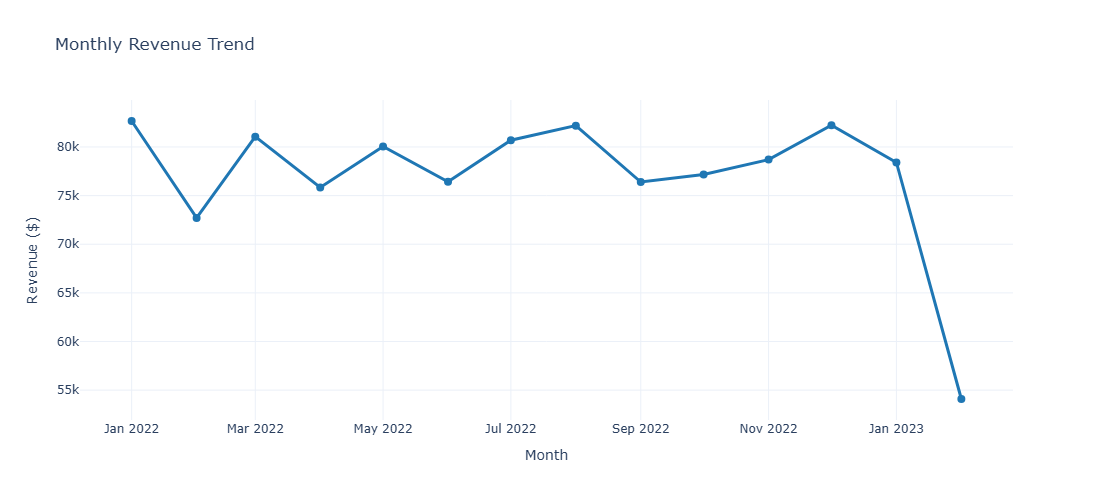

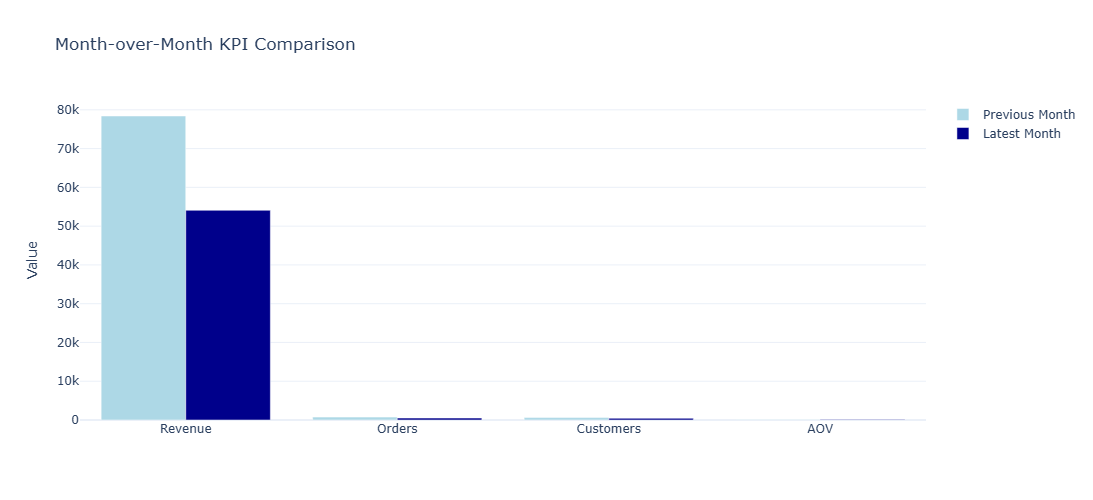

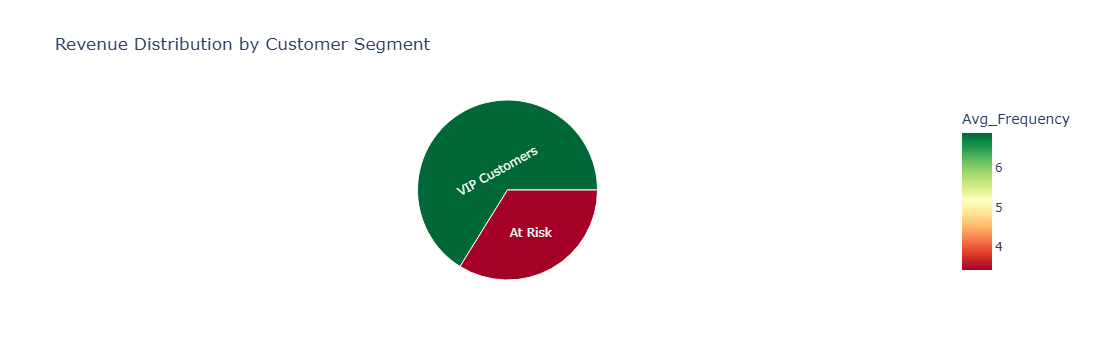



FINANCIAL PERFORMANCE:
  • Total Revenue: $1,078,670.98
  • Total Profit: $198,274.85
  • Profit Margin: 18.38%
  • Average Order Value: $107.87

CUSTOMER METRICS:
  • Total Customers: 1,986
  • Repeat Customer Rate: 96.27%
  • Customer Retention Rate: 89.12%
  • Churn Rate: 10.88%
  • Average CLV: $7,637.86

OPERATIONAL METRICS:
  • Total Orders: 10,000
  • Total Units Sold: 50,065
  • Avg Orders per Customer: 5.04
  • Avg Items per Order: 5.01

MARKETING EFFICIENCY:
  • CLV/CAC Ratio: 152.76x
  • Customer Acquisition Cost: $50.00
  • Profit per Customer: $99.84
  • CAC Payback Period: 4.4 months

2. CUSTOMER SEGMENTATION INSIGHTS


At Risk:
  • Size: 1,062 customers (53.5%)
  • Revenue Contribution: $365,006.99 (33.8%)
  • Avg Purchase Frequency: 3.42 orders
  • Avg Recency: 112.8 days

VIP Customers:
  • Size: 924 customers (46.5%)
  • Revenue Contribution: $713,663.99 (66.2%)
  • Avg Purchase Frequency: 6.89 orders
  • Avg Recency: 45.8 days


3. TOP PERFORMING CATEGORIES

1. Ele

In [166]:
# CREATING KPI VISUALIZATIONS
fig = go.Figure()
kpi_cards = [
    {'title': 'Total Revenue', 'value': f"${kpis['Total_Revenue']:,.0f}", 'color': '#1f77b4'},
    {'title': 'Total Customers', 'value': f"{kpis['Total_Customers']:,}", 'color': '#ff7f0e'},
    {'title': 'Avg Order Value', 'value': f"${kpis['Avg_Order_Value']:.2f}", 'color': '#2ca02c'},
    {'title': 'Retention Rate', 'value': f"{kpis.get('Retention_Rate', 0):.1f}%", 'color': '#d62728'},
    {'title': 'CLV/CAC Ratio', 'value': f"{kpis['CLV_to_CAC_Ratio']:.2f}x", 'color': '#9467bd'},
    {'title': 'Total Orders', 'value': f"{kpis['Total_Orders']:,}", 'color': '#8c564b'}]
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_kpis['YearMonth'],y=monthly_kpis['Revenue'],mode='lines+markers', name='Revenue',line=dict(color='#1f77b4', width=3),marker=dict(size=8)))
fig.update_layout(title='Monthly Revenue Trend',xaxis_title='Month',yaxis_title='Revenue ($)',hovermode='x unified',height=500,template='plotly_white')
fig.show()

if len(monthly_kpis) >= 2:
    latest_month = monthly_kpis.iloc[-1]
    previous_month = monthly_kpis.iloc[-2]
    comparison_metrics = ['Revenue', 'Orders', 'Customers', 'AOV']
    latest_values = [latest_month[m] for m in comparison_metrics]
    previous_values = [previous_month[m] for m in comparison_metrics]
    growth = [((l - p) / p * 100) if p != 0 else 0 for l, p in zip(latest_values, previous_values)]
    fig = go.Figure(data=[go.Bar(name='Previous Month', x=comparison_metrics, y=previous_values, marker_color='lightblue'),
        go.Bar(name='Latest Month', x=comparison_metrics, y=latest_values, marker_color='darkblue')])
    fig.update_layout(title='Month-over-Month KPI Comparison',barmode='group',yaxis_title='Value',height=500,template='plotly_white')
    fig.show()

if 'Cluster_Name' in rfm.columns:
    segment_performance = rfm.groupby('Cluster_Name').agg({
        'Customer_ID': 'count',
        'Monetary': 'sum',
        'Frequency': 'mean'}).reset_index()
    segment_performance.columns = ['Segment', 'Customer_Count', 'Total_Revenue', 'Avg_Frequency']
    fig = px.sunburst(segment_performance, path=['Segment'], values='Total_Revenue',title='Revenue Distribution by Customer Segment',color='Avg_Frequency',color_continuous_scale='RdYlGn')
    fig.show()

executive_summary = f"""

FINANCIAL PERFORMANCE:
  • Total Revenue: ${kpis['Total_Revenue']:,.2f}
  • Total Profit: ${kpis['Total_Profit']:,.2f}
  • Profit Margin: {kpis['Profit_Margin_Pct']:.2f}%
  • Average Order Value: ${kpis['Avg_Order_Value']:,.2f}

CUSTOMER METRICS:
  • Total Customers: {kpis['Total_Customers']:,}
  • Repeat Customer Rate: {kpis['Repeat_Customer_Rate']:.2f}%
  • Customer Retention Rate: {kpis.get('Retention_Rate', 0):.2f}%
  • Churn Rate: {kpis.get('Churn_Rate', 0):.2f}%
  • Average CLV: ${kpis['Avg_Customer_Lifetime_Value']:,.2f}

OPERATIONAL METRICS:
  • Total Orders: {kpis['Total_Orders']:,}
  • Total Units Sold: {kpis['Total_Units_Sold']:,}
  • Avg Orders per Customer: {kpis['Avg_Orders_Per_Customer']:.2f}
  • Avg Items per Order: {kpis['Avg_Items_Per_Order']:.2f}

MARKETING EFFICIENCY:
  • CLV/CAC Ratio: {kpis['CLV_to_CAC_Ratio']:.2f}x
  • Customer Acquisition Cost: ${kpis['Customer_Acquisition_Cost']:,.2f}
  • Profit per Customer: ${kpis['Profit_Per_Customer']:,.2f}
  • CAC Payback Period: {kpis['CAC_Payback_Months']:.1f} months

{'='*80}
2. CUSTOMER SEGMENTATION INSIGHTS
{'='*80}

"""

if 'Cluster_Name' in rfm.columns:
    segment_summary = rfm.groupby('Cluster_Name').agg({
        'Customer_ID': 'count',
        'Monetary': ['sum', 'mean'],
        'Frequency': 'mean',
        'Recency': 'mean'})
    for segment in segment_summary.index:
        count = segment_summary.loc[segment, ('Customer_ID', 'count')]
        pct = (count / len(rfm) * 100)
        total_rev = segment_summary.loc[segment, ('Monetary', 'sum')]
        rev_pct = (total_rev / rfm['Monetary'].sum() * 100)
        avg_freq = segment_summary.loc[segment, ('Frequency', 'mean')]
        avg_recency = segment_summary.loc[segment, ('Recency', 'mean')]
        executive_summary += f"""
{segment}:
  • Size: {count:,} customers ({pct:.1f}%)
  • Revenue Contribution: ${total_rev:,.2f} ({rev_pct:.1f}%)
  • Avg Purchase Frequency: {avg_freq:.2f} orders
  • Avg Recency: {avg_recency:.1f} days
"""

executive_summary += f"""

{'='*80}
3. TOP PERFORMING CATEGORIES
{'='*80}

"""
if 'Product_Category' in df1.columns:
    top_categories = df1.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False).head(5)
    for idx, (category, revenue) in enumerate(top_categories.items(), 1):
        pct = (revenue / df1['Sales'].sum() * 100)
        executive_summary += f"{idx}. {category}: ${revenue:,.2f} ({pct:.1f}%)\n"

executive_summary += f"""

{'='*80}
4. KEY FINDINGS & INSIGHTS
{'='*80}

POSITIVE TRENDS:
  ✓ Customer Lifetime Value is {kpis['CLV_to_CAC_Ratio']:.1f}x the acquisition cost (Healthy: >3.0)
  ✓ {kpis['Repeat_Customer_Rate']:.1f}% of customers make repeat purchases
  ✓ Average order value is ${kpis['Avg_Order_Value']:.2f}

AREAS FOR IMPROVEMENT:
  ⚠ Customer retention rate at {kpis.get('Retention_Rate', 0):.1f}% (Target: 45-50%)
  ⚠ Churn rate of {kpis.get('Churn_Rate', 0):.1f}% requires attention
  ⚠ {kpis['One_Time_Customers']:,} customers made only one purchase

OPPORTUNITIES:
  • Focus on {segment_counts.index[0] if 'Cluster_Name' in rfm.columns else 'high-value'} segment for retention
  • Implement win-back campaigns for at-risk customers
  • Optimize product mix based on category performance
  • Personalize marketing by customer segment

{'='*80}
5. STRATEGIC RECOMMENDATIONS
{'='*80}

IMMEDIATE ACTIONS (0-30 Days):
  1. Launch loyalty program for top customer segments
  2. Implement win-back campaign for churned customers
  3. Optimize top-performing product visibility
  4. Set up automated customer retention alerts

SHORT-TERM INITIATIVES (2-3 Months):
  1. Develop personalized email marketing campaigns
  2. Test dynamic pricing strategies by segment
  3. Expand product offerings in high-performing categories
  4. Implement referral program

LONG-TERM STRATEGY (6-12 Months):
  1. Build predictive churn model
  2. Develop AI-powered recommendation engine
  3. Create customer success program
  4. Invest in customer experience improvements

EXPECTED IMPACT:
  • Revenue increase: 15-20%
  • Retention improvement: 25-30%
  • CLV growth: 10-15%
  • Churn reduction: 20-25%

{'='*80}
6. NEXT STEPS
{'='*80}

  1. Review findings with executive team
  2. Prioritize recommendations based on ROI potential
  3. Allocate budget for approved initiatives
  4. Establish KPI tracking dashboard
  5. Schedule monthly performance reviews

{'='*80}
END OF EXECUTIVE SUMMARY
{'='*80}
"""

print(executive_summary)